# NETTOYAGE DATA RAW ET CREATION NOUVEAUX DATAFRAMES    

## 1. NETTOYAGE GAMES

In [113]:
# ======================================================
#  TEMPLATE DE NETTOYAGE DE DONNÉES - PANDAS
# ======================================================

import pandas as pd
import numpy as np

# 1️. Importation
file_path = "data_raw/Olympics_Games.csv"  # Remplacer par son fichier
df_games = pd.read_csv(file_path)



In [114]:
# 2️. Inspection initiale
def inspect_init(df):
    print("Aperçu des données :")
    display(df)

    print("\nInformations générales :")
    df.info()

    print("\nRésumé statistique :")
    display(df.describe(include='all'))

    print(f"\nD. Dimensions du DataFrame : {df.shape[0]} lignes et {df.shape[1]} colonnes")

inspect_init(df_games)

Aperçu des données :


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN
...,...,...,...,...,...,...,...,...,...,...,...
59,2018 Winter Olympics,60,/editions/60,2018,PyeongChang,https://olympedia-flags.s3.eu-central-1.amazon...,KOR,9 February,25 February,8 – 25 February,NaN
60,2022 Winter Olympics,62,/editions/62,2022,Beijing,https://olympedia-flags.s3.eu-central-1.amazon...,CHN,4 February,20 February,2 – 20 February,NaN
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,https://olympedia-flags.s3.eu-central-1.amazon...,ITA,6 February,22 February,4 – 22 February,NaN
62,1956 Equestrian,48,/editions/48,1956,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,10 June,17 June,11 – 17 June,NaN



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB

Résumé statistique :


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
count,64,64.000000,64,64.000000,64,64,64,55,54,64,5
unique,64,NaN,64,NaN,45,25,25,43,41,57,1
top,1896 Summer Olympics,NaN,/editions/1,NaN,London,https://olympedia-flags.s3.eu-central-1.amazon...,USA,19 July,12 August,—,Not held due to war
freq,1,NaN,1,NaN,4,9,9,3,3,8,5
mean,NaN,38.578125,NaN,1967.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,46.504072,NaN,37.385168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,16.750000,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,34.500000,NaN,1968.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,50.250000,NaN,1998.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



D. Dimensions du DataFrame : 64 lignes et 11 colonnes


In [115]:
# 3️. Nettoyage des noms de colonnes
def colonnes(df):
    df.columns = (
        df.columns
        .str.strip()               # Supprimer les espaces
        .str.lower()               # Mettre en minuscules
        .str.replace(' ', '_')     # Remplacer les espaces par _
        .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # Supprimer les caractères spéciaux
    )

colonnes(df_games)

In [116]:
# 4. Gestion des valeurs manquantes
def val_manquantes(df):
    print("\nValeurs manquantes :")
    display(df.isna().sum())

    missing_percentage = df.isna().sum() / len(df) * 100
    print("\nPourcentage de valeurs manquantes par colonne :")
    display(missing_percentage.sort_values(ascending=False))

val_manquantes(df_games)


Valeurs manquantes :


edition              0
edition_id           0
edition_url          0
year                 0
city                 0
country_flag_url     0
country_noc          0
start_date           9
end_date            10
competition_date     0
isheld              59
dtype: int64


Pourcentage de valeurs manquantes par colonne :


isheld              92.1875
end_date            15.6250
start_date          14.0625
edition_url          0.0000
edition_id           0.0000
edition              0.0000
year                 0.0000
country_noc          0.0000
country_flag_url     0.0000
city                 0.0000
competition_date     0.0000
dtype: float64

In [117]:
# 5️. Vérification et Gestion des doublons
def doublons(df):
    nb_doublons = df.duplicated().sum()
    print(f"\nDoublons détectés : {nb_doublons}")

    return nb_doublons

doublons(df_games)


Doublons détectés : 0


np.int64(0)

In [118]:
# 6️. Vérification et correction des types
# RAS

In [119]:
# 7️. Nettoyage des chaînes de caractères
def nettoyage_caracteres(df):
    obj_cols = df.select_dtypes(include='object').columns
    
    for col in obj_cols:
        df[col] = df[col].astype(str).str.strip()        # .astype(str) pour les valeurs non-string (ex: NaN)

    return df, obj_cols

nettoyage_caracteres(df_games)

(                 edition  edition_id   edition_url  year  \
 0   1896 Summer Olympics           1   /editions/1  1896   
 1   1900 Summer Olympics           2   /editions/2  1900   
 2   1904 Summer Olympics           3   /editions/3  1904   
 3   1908 Summer Olympics           5   /editions/5  1908   
 4   1912 Summer Olympics           6   /editions/6  1912   
 ..                   ...         ...           ...   ...   
 59  2018 Winter Olympics          60  /editions/60  2018   
 60  2022 Winter Olympics          62  /editions/62  2022   
 61  2026 Winter Olympics          72  /editions/72  2026   
 62       1956 Equestrian          48  /editions/48  1956   
 63     1906 Intercalated           4   /editions/4  1906   
 
                         city  \
 0                     Athina   
 1                      Paris   
 2                  St. Louis   
 3                     London   
 4                  Stockholm   
 ..                       ...   
 59               PyeongChang   
 6

In [120]:
# 8️. Vérification des valeurs incohérentes et Outliers
    # 8.1 Harmonisation des valeurs et données catégorielles
    # RAS

    # 8.2 Détection et gestion des valeurs aberrantes (Outliers)
    # RAS

    # 8.3 Vérification de l'Intégrité des Données / Règles Métier
    # RAS

df_games

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isheld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,nan
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,nan,nan,14 May – 28 October,nan
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,nan,1 July – 26 November,nan
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,nan
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,nan
...,...,...,...,...,...,...,...,...,...,...,...
59,2018 Winter Olympics,60,/editions/60,2018,PyeongChang,https://olympedia-flags.s3.eu-central-1.amazon...,KOR,9 February,25 February,8 – 25 February,nan
60,2022 Winter Olympics,62,/editions/62,2022,Beijing,https://olympedia-flags.s3.eu-central-1.amazon...,CHN,4 February,20 February,2 – 20 February,nan
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,https://olympedia-flags.s3.eu-central-1.amazon...,ITA,6 February,22 February,4 – 22 February,nan
62,1956 Equestrian,48,/editions/48,1956,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,10 June,17 June,11 – 17 June,nan


In [121]:
# 9️. Création / transformation de colonnes

colonnes_a_supprimer = ['start_date' , 'end_date', 'competition_date' ,	'isheld']

df_games = df_games.drop(columns=colonnes_a_supprimer , axis=1)

In [122]:
#Ajouter colonne summer/winter sur table 

df_games["season"] = df_games["edition"].apply(
    lambda x: "Summer"if "Summer" in x
    else "Winter" if "Winter" in x
    else "Other")

In [123]:
# Intégration des jeux equestres de 1956 aux jeux d'été de 1956 

df_games['edition'] = df_games['edition'].replace({"1956 Equestrian" : "1956 Summer Olympics"})
df_games['edition_id'] = df_games['edition_id'].replace({48 : 14})

# Suppression de la ligne avec l'index 62
df_games = df_games.drop(index=62)
df_games.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,season
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,Summer
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,Summer
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,Summer
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,Summer
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,Summer


## 2. NETTOYAGE COUNTRY

In [124]:
# 1️. Importation
file_path = "data_raw/Olympics_Country.csv"  # Remplacer par son fichier
df_country = pd.read_csv(file_path)

In [125]:
# 2️. Inspection initiale
inspect_init(df_country)

Aperçu des données :


,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra
...,...,...
230,YEM,Yemen
231,YUG,Yugoslavia
232,ZAM,Zambia
233,ZIM,Zimbabwe



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noc      235 non-null    object
 1   country  235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB

Résumé statistique :


,noc,country
count,235,235
unique,234,235
top,ROC,Afghanistan
freq,2,1



D. Dimensions du DataFrame : 235 lignes et 2 colonnes


In [126]:
# 3️. Nettoyage des noms de colonnes
colonnes(df_country)

In [127]:
# 4. Gestion des valeurs manquantes
val_manquantes(df_country)


Valeurs manquantes :


noc        0
country    0
dtype: int64


Pourcentage de valeurs manquantes par colonne :


noc        0.0
country    0.0
dtype: float64

In [128]:
# 5️. Suppression des doublons
doublons(df_country)


Doublons détectés : 0


np.int64(0)

In [129]:
# 6️. Vérification et correction des types
# RAS

In [130]:
# 7️. Nettoyage des chaînes de caractères
nettoyage_caracteres(df_country)

(     noc                    country
 0    AFG                Afghanistan
 1    ALB                    Albania
 2    ALG                    Algeria
 3    ASA             American Samoa
 4    AND                    Andorra
 ..   ...                        ...
 230  YEM                      Yemen
 231  YUG                 Yugoslavia
 232  ZAM                     Zambia
 233  ZIM                   Zimbabwe
 234  ROC  Russian Olympic Committee
 
 [235 rows x 2 columns],
 Index(['noc', 'country'], dtype='object'))

In [131]:
# 8️. Vérification des valeurs incohérentes et Outliers
# RAS

In [132]:
# 9️. Création / transformation de colonnes

# Ajout d'une colonne continent
# mappage noc aux continents 

noc_to_continent ={
        'AFG': 'Asia', 'ARM': 'Asia', 'AZE': 'Asia', 'BRN': 'Asia', 'BAN':'Asia', 'BHU': 'Asia',
        'BRU': 'Asia', 'CAM': 'Asia', 'TPE': 'Asia', 'PRK': 'Asia', 'HKG': 'Asia', 'IND': 'Asia',
        'INA': 'Asia', 'IRQ': 'Asia', 'IRI': 'Asia', 'ISR': 'Asia', 'JPN': 'Asia', 'JOR': 'Asia',
        'KSA': 'Asia', 'COR': 'Asia', 'KUW': 'Asia', 'KGZ': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia',
        'MAL': 'Asia', 'MAS': 'Asia', 'MDV': 'Asia', 'MGL': 'Asia', 'MYA': 'Asia', 'NEP': 'Asia',
        'NBO': 'Asia', 'YAR': 'Asia', 'OMA': 'Asia', 'PAK': 'Asia', 'PLE': 'Asia', 'CHN': 'Asia',
        'PHI': 'Asia', 'QAT': 'Asia', 'KOR': 'Asia', 'SGP': 'Asia', 'VNM': 'Asia', 'YMD': 'Asia',
        'SRI': 'Asia', 'SYR': 'Asia', 'TJK': 'Asia', 'THA': 'Asia', 'TLS': 'Asia', 'TUR': 'Asia',
        'TKM': 'Asia', 'UAE': 'Asia', 'UAR': 'Asia', 'UZB': 'Asia', 'VIE': 'Asia', 'YEM': 'Asia',

        'ASA': 'Oceania', 'ANZ': 'Oceania', 'AUS': 'Oceania', 'Cok': 'Oceania', 'FSM': 'Oceania',
        'FIJ': 'Oceania', 'GUM': 'Oceania', 'KIR': 'Oceania', 'MHL': 'Oceania', 'NRU': 'Oceania',
        'NZL': 'Oceania', 'PLW': 'Oceania', 'PNG': 'Oceania', 'SAM': 'Oceania', 'SOL': 'Oceania',
        'TGA': 'Oceania', 'TUV': 'Oceania', 'VAN': 'Oceania',

        'ALB': 'Europe', 'AND': 'Europe', 'AUT': 'Europe', 'BLR': 'Europe', 'BEL': 'Europe', 
        'BOH': 'Europe', 'BIH': 'Europe', 'BUL': 'Europe', 'CRT': 'Europe', 'CRO': 'Europe',
        'CYP': 'Europe', 'CZE': 'Europe', 'TCH': 'Europe', 'DEN': 'Europe', 'GDR': 'Europe', 
        'EST': 'Europe', 'FIN': 'Europe', 'FRA': 'Europe', 'GEO': 'Europe', 'GER': 'Europe', 
        'GBR': 'Europe', 'GRE': 'Europe', 'HUN': 'Europe', 'ISL': 'Europe', 'IRL': 'Europe',
        'ITA': 'Europe', 'KAZ': 'Europe', 'KOS': 'Europe', 'LAT': 'Europe', 'LIE': 'Europe', 
        'LTU': 'Europe', 'LUX': 'Europe', 'MLT': 'Europe', 'MON': 'Europe', 'MNE': 'Europe',
        'NED': 'Europe', 'MKD': 'Europe', 'NOR': 'Europe', 'POL': 'Europe', 'POR': 'Europe', 
        'MDA': 'Europe', 'ROU': 'Europe', 'RUS': 'Europe', 'SAA': 'Europe', 'SMR': 'Europe',
        'SRB': 'Europe', 'SCG': 'Europe', 'SVk': 'Europe', 'SLO': 'Europe', 'URS': 'Europe',
        'ESP': 'Europe', 'SWE': 'Europe', 'SUI': 'Europe', 'UKR': 'Europe', 'FRG': 'Europe', 
        'YUG': 'Europe',

        'ANT': 'America', 'ARG': 'America', 'ARU': 'America', 'BAR': 'America', 'BIZ': 'America',
        'BER': 'America', 'BOL': 'America', 'BRA': 'America', 'IVB': 'America', 'CAN': 'America',
        'CAY': 'America', 'CHI': 'America', 'COL': 'America', 'CRC': 'America', 'CUB': 'America', 
        'DMA': 'America', 'DOM': 'America', 'ECU': 'America', 'ESA': 'America', 'GRN': 'America',
        'GUA': 'America', 'GUY': 'America', 'HAI': 'America', 'HON': 'America', 'JAM': 'America',
        'MEX': 'America', 'AHO': 'America', 'NFL': 'America', 'NCA': 'America', 'PAN': 'America', 
        'PAR': 'America', 'PER': 'America', 'PUR': 'America', 'SKN': 'America', 'LCA': 'America',
        'VIN': 'America', 'SUR': 'America', 'BAH': 'America', 'TTO': 'America', 'USA': 'America', 
        'ISV': 'America', 'URU': 'America', 'VEN': 'America', 'WIF': 'America', 

        'ALG': 'Africa', 'ANG': 'Africa', 'BEN': 'Africa', 'BOT': 'Africa', 'BUR': 'Africa',
        'BDI': 'Africa', 'CPV': 'Africa', 'CMR': 'Africa', 'CAF': 'Africa', 'CHA': 'Africa',
        'COM': 'Africa', 'CGO': 'Africa', 'CIV': 'Africa', 'COD': 'Africa', 'DJI': 'Africa',
        'GEQ': 'Africa', 'ERI': 'Africa', 'SWZ': 'Africa', 'ETH': 'Africa', 'GAB': 'Africa',
        'GHA': 'Africa', 'GUI': 'Africa', 'GBS': 'Africa', 'KEN': 'Africa', 'LES': 'Africa',
        'LBR': 'Africa', 'LBA': 'Africa', 'MAD': 'Africa', 'MAW': 'Africa', 'MLI': 'Africa',
        'MTN': 'Africa', 'MRI': 'Africa', 'MAR': 'Africa', 'MOZ': 'Africa', 'NAM': 'Africa',
        'NIG': 'Africa', 'RHO': 'Africa', 'RWA': 'Africa', 'STP': 'Africa', 'SEN': 'Africa', 
        'SEY': 'Africa', 'SLE': 'Africa', 'SOM': 'Africa', 'RSA': 'Africa', 'SSD': 'Africa',
        'SUD': 'Africa', 'GAM': 'Africa', 'TOG': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa',
        'TAN': 'Africa', 'ZAM': 'Africa', 'ZIM': 'Africa', 'EGY': 'Africa',

        'IOA': 'Neutral', 'AIN': 'Neutral', 'MIX': 'Neutral', 'EOR': 'Neutral', 'ROC': 'Neutral',
        'EUN': 'Neutral', 

        'UNK': 'Unknown'
}

In [133]:
# Création d'une fonction 

def get_continent(noc_code):

    return noc_to_continent.get(noc_code)


# application nouvelle colonne continent dans le dataset olympic_country
# verification que les codes sont bien en majuscules
df_country['noc'] = df_country['noc'].str.upper()

#creation nouvelle colonne continent 
df_country['continent'] = df_country['noc'].apply(lambda x: get_continent(x))

df_country.sample(10)

,noc,country,continent
111,LAT,Latvia,Europe
198,SUR,Suriname,America
118,LUX,Luxembourg,Europe
137,NAM,Namibia,Africa
61,ECU,Ecuador,America
69,FSM,Federated States of Micronesia,Oceania
230,YEM,Yemen,Asia
72,FRA,France,Europe
86,HON,Honduras,America
216,EUN,Unified Team,Neutral


## 3. NETTOYAGE RESULT

In [134]:
# 1️. Importation
file_path = "data_raw/Olympic_Results.csv"  
df_result = pd.read_csv(file_path)

In [135]:
# 2️. Inspection initiale
inspect_init(df_result)

Aperçu des données :


,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na,na,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na,na,Two former Olympic champions in the C-1 slalom...
...,...,...,...,...,...,...,...,...,...,...,...,...
7389,19001250,"Basketball, Men",2020 Summer Olympics,61,Basketball,/editions/61/sports/BKB,25 July – 7 August 2021,"Saitama Super Arena, Chūō-ku, Saitama, Saitama...",143 from 12 countries,Round-robin pools advance teams to classificat...,na,All the games took place at Saitama Super Aren...
7390,84835,"Sabre, Team, Men",1936 Summer Olympics,11,Fencing,/editions/11/sports/FEN,12 – 13 August 1936,"Sportforum, Turnhalle, Reichssportfeld, Berlin...",107 from 21 countries,na,na,On the middle of an era of total domination of...
7391,72031,"Foil, Individual, Men",1900 Summer Olympics,2,Fencing,/editions/2/sports/FEN,14 – 21 May 1900,"La Grande Salle des Fêtes de l'Exposition, Cha...",53 from 9 countries,na,na,There were 53 fencers from 9 nations but 39 of...
7392,258676,"Beach Volleyball, Women",2008 Summer Olympics,53,Beach Volleyball,/editions/53/sports/VBV,9 – 21 August 2008,"Chaoyang Gongyuan Shatan Paiqiu Chang, Beijing",48 from 17 countries,Top 16 teams from round-robin pools advanced t...,na,"After winning the 2004 gold medal, Misty May a..."



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB

Résumé statistique :


,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
count,7.394000e+03,7394,7394,7394.000000,7394,7394,7394,7393,7394,7394,7394,7394
unique,NaN,1605,55,NaN,112,1138,3656,954,2055,658,487,6982
top,NaN,"Individual, Men",1904 Summer Olympics,NaN,Athletics,/editions/3/sports/ATH,20 August 1904,"Francis Field, Washington University, St. Louis",3 from 1 countries,na,na,na
freq,NaN,96,404,NaN,1335,280,28,338,197,3932,6652,406
mean,1.535217e+06,NaN,NaN,27.647011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.104084e+06,NaN,NaN,19.200363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.002525e+04,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.077100e+04,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.310878e+05,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



D. Dimensions du DataFrame : 7394 lignes et 12 colonnes


In [136]:
# 3️. Nettoyage des noms de colonnes
colonnes(df_result)

In [137]:
# 4. Gestion des valeurs manquantes
val_manquantes(df_result)


Valeurs manquantes :


result_id              0
event_title            0
edition                0
edition_id             0
sport                  0
sport_url              0
result_date            0
result_location        1
result_participants    0
result_format          0
result_detail          0
result_description     0
dtype: int64


Pourcentage de valeurs manquantes par colonne :


result_location        0.013524
result_id              0.000000
edition                0.000000
event_title            0.000000
edition_id             0.000000
sport                  0.000000
sport_url              0.000000
result_date            0.000000
result_participants    0.000000
result_format          0.000000
result_detail          0.000000
result_description     0.000000
dtype: float64

In [138]:
# 5️. Vérification et Gestion des doublons
doublons(df_result)


Doublons détectés : 0


np.int64(0)

In [139]:
# 6️. Vérification et correction des types
# RAS

In [140]:
# 7️. Nettoyage des chaînes de caractères
nettoyage_caracteres(df_result)     

(      result_id                              event_title  \
 0         30359  Super-Heavyweight (>105 kilograms), Men   
 1          1626                     Giant Slalom, Women1   
 2            76                             Singles, Men   
 3           962                        1,500 metres, Men   
 4        258824            Canadian Singles, Slalom, Men   
 ...         ...                                      ...   
 7389   19001250                          Basketball, Men   
 7390      84835                         Sabre, Team, Men   
 7391      72031                    Foil, Individual, Men   
 7392     258676                  Beach Volleyball, Women   
 7393      48121                             Doubles, Men   
 
                    edition  edition_id             sport  \
 0     2004 Summer Olympics          26     Weightlifting   
 1     1998 Winter Olympics          46      Snowboarding   
 2     1976 Winter Olympics          40              Luge   
 3     1928 Winter Oly

In [141]:
# 8️. Vérification des valeurs incohérentes et Outliers
# RAS

In [142]:
# 9️. Création / transformation de colonnes

# Intégration des jeux equestres de 1956 aux jeux d'été de 1956 

df_result['edition'] = df_result['edition'].replace({'1956 Equestrian Olympics': '1956 Summer Olympics'})
df_result['edition_id'] = df_result['edition_id'].replace({48 : 14})

## 4. NETTOYAGE ATHLETE BIO

In [143]:
# 1️. Importation
file_path = "data_raw/Olympic_Athlete_Bio.csv" 
df_bio = pd.read_csv(file_path)

In [144]:
# 2️. Inspection initiale
inspect_init(df_bio)

Aperçu des données :


,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN
...,...,...,...,...,...,...,...,...,...,...
155856,23748,Todd Makler,Male,8 January 1946,183.0,75,United States,USA,"Todd Makler grew up in suburban Philadelphia, ...","Brother of Brooke Makler Son of Paul Makler, Sr."
155857,58581,Géza Hollósi,Male,2 May 1938,175.0,79,Hungary,HUN,Géza Hollósi had the following finishes at maj...,NaN
155858,30387,József Keresztessy,Male,19 September 1885,NaN,NaN,Hungary,HUN,József Keresztessy was the grandson of József ...,NaN
155859,69900,Alexander Thieme,Male,13 January 1954,187.0,84,East Germany,GDR,East German Sprinter Alexander Thieme reached ...,Listed in Olympians Who Won a Medal at the Eur...



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.9+ MB

Résumé statistique :


,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
count,1.558610e+05,155861,155861,151808,105112.000000,105112,155861,155861,54863,60637
unique,NaN,152747,2,42687,NaN,576,707,232,54011,53324
top,NaN,Ivan Ivanov,Male,1931,NaN,70,United States,USA,Personal Best: Mar – unknown.,Listed in Olympians Who Received the Italian O...
freq,NaN,13,115527,61,NaN,4818,11691,11693,103,251
mean,1.571606e+05,NaN,NaN,NaN,176.327194,NaN,NaN,NaN,NaN,NaN
std,3.274205e+05,NaN,NaN,NaN,10.355980,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,127.000000,NaN,NaN,NaN,NaN,NaN
25%,3.927100e+04,NaN,NaN,NaN,170.000000,NaN,NaN,NaN,NaN,NaN
50%,7.852900e+04,NaN,NaN,NaN,176.000000,NaN,NaN,NaN,NaN,NaN
75%,1.189230e+05,NaN,NaN,NaN,183.000000,NaN,NaN,NaN,NaN,NaN



D. Dimensions du DataFrame : 155861 lignes et 10 colonnes


In [145]:
# 3️. Nettoyage des noms de colonnes
colonnes(df_bio)

In [146]:
# 4. Gestion des valeurs manquantes
val_manquantes(df_bio)


Valeurs manquantes :


athlete_id            0
name                  0
sex                   0
born               4053
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64


Pourcentage de valeurs manquantes par colonne :


description      64.800046
special_notes    61.095463
weight           32.560422
height           32.560422
born              2.600394
athlete_id        0.000000
name              0.000000
sex               0.000000
country_noc       0.000000
country           0.000000
dtype: float64

In [147]:
# 5️. Suppression des doublons
doublons(df_bio)


Doublons détectés : 0


np.int64(0)

In [148]:
# 6️. Vérification et correction des types

# Conversion de la colonne 'born' en type datetime
# Conversion de la colonne 'weight' en numeric
df_bio["born"] = pd.to_datetime(df_bio["born"], errors="coerce")
df_bio["weight"] = pd.to_numeric(df_bio["weight"], errors="coerce")

print("\nType de donnée après conversion :")
print(df_bio['born'].dtype)

print("\nDataFrame après conversion :")
display(df_bio)


Type de donnée après conversion :
datetime64[ns]

DataFrame après conversion :


,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN
...,...,...,...,...,...,...,...,...,...,...
155856,23748,Todd Makler,Male,1946-01-08,183.0,75.0,United States,USA,"Todd Makler grew up in suburban Philadelphia, ...","Brother of Brooke Makler Son of Paul Makler, Sr."
155857,58581,Géza Hollósi,Male,1938-05-02,175.0,79.0,Hungary,HUN,Géza Hollósi had the following finishes at maj...,NaN
155858,30387,József Keresztessy,Male,1885-09-19,NaN,NaN,Hungary,HUN,József Keresztessy was the grandson of József ...,NaN
155859,69900,Alexander Thieme,Male,1954-01-13,187.0,84.0,East Germany,GDR,East German Sprinter Alexander Thieme reached ...,Listed in Olympians Who Won a Medal at the Eur...


In [149]:
# 7️. Nettoyage des chaînes de caractères
nettoyage_caracteres(df_bio)

(        athlete_id                name     sex       born  height  weight  \
 0            65649       Ivanka Bonova  Female 1949-04-04   166.0    55.0   
 1           112510   Nataliya Uryadova  Female 1977-03-15   184.0    70.0   
 2           114973  Essa Ismail Rashed    Male 1986-12-14   165.0    55.0   
 3            30359         Péter Boros    Male 1908-01-12     NaN     NaN   
 4            50557      Rudolf Piowatý    Male 1900-04-28     NaN     NaN   
 ...            ...                 ...     ...        ...     ...     ...   
 155856       23748         Todd Makler    Male 1946-01-08   183.0    75.0   
 155857       58581        Géza Hollósi    Male 1938-05-02   175.0    79.0   
 155858       30387  József Keresztessy    Male 1885-09-19     NaN     NaN   
 155859       69900    Alexander Thieme    Male 1954-01-13   187.0    84.0   
 155860       74003         Sunday Bada    Male 1969-06-22   188.0    79.0   
 
                    country country_noc  \
 0                 

In [150]:
# 8️. Vérification des valeurs incohérentes et Outliers
df_bio, obj_cols = nettoyage_caracteres(df_bio)

for col in obj_cols:
    print(f"\nValeurs uniques dans {col}:")
    print(df_bio[col].unique()[:10])                                 # Limité à 10 pour éviter trop de lignes  


Valeurs uniques dans name:
['Ivanka Bonova' 'Nataliya Uryadova' 'Essa Ismail Rashed' 'Péter Boros'
 'Rudolf Piowatý' 'Svetlana Kholomina' 'Vincent Riendeau' 'Tanja Morel'
 'Maksim Shabalin' 'Gé Regter']

Valeurs uniques dans sex:
['Female' 'Male']

Valeurs uniques dans country:
['Bulgaria' 'Russian Federation' 'Qatar' 'Hungary' 'Czechoslovakia' 'ROC'
 'Canada' 'Switzerland' 'Netherlands' 'Italy']

Valeurs uniques dans country_noc:
['BUL' 'RUS' 'QAT' 'HUN' 'TCH' 'ROC' 'CAN' 'SUI' 'NED' 'ITA']

Valeurs uniques dans description:
['Personal Best: 400 – 53.54 (1980).' 'nan'
 'Personal Best: 10000 – 27:20.97 (2006).'
 'Between 1927 and 1938, Péter Boros competed as a gymnast of BBTE. He won the Hungarian championship in rope climbing in 1932, and as part of the winning team in 1932, 1937 and 1938. As a member of the Hungarian national team, he took part in the 1930 World Championships and the 1932 Olympics both times finishing fourth in the team event. In individual events, he took two 5th 

In [151]:
# 9️. Création / transformation de colonnes
# Suppression de 2 colonnes

col_a_supprimer = ['description','special_notes']

df_bio = df_bio.drop(columns=col_a_supprimer , axis=1)
df_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH


In [152]:
#Ajout d'une colonne Âge
#Ajout d'une colonne IMC

df_bio["imc"] = df_bio["weight"] / ((df_bio["height"] / 100) ** 2)
df_bio["ip"] = df_bio["weight"] / ((df_bio["height"] / 100) ** 3)
df_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT,20.202020,12.243649
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN,NaN,NaN
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH,NaN,NaN


In [153]:
# Ajout d'une colonne "born_age" qui nous permettra plus tard de calculer l'age de l'athlete pour chacune de ses participations

df_bio['born_year'] = df_bio['born'].dt.year
df_bio['born_year'].dtypes
df_bio['born_year'] = df_bio['born_year'].astype('Int64')
df_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip,born_year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708,1949
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850,1977
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT,20.202020,12.243649,1986
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN,NaN,NaN,1908
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH,NaN,NaN,1900


## 5. NETTOYAGE ATHLETE EVENT RESULTS

In [154]:
# 1️. Importation
file_path = "data_raw/Olympic_Athlete_Event_Results.csv" 
df_athlete_result = pd.read_csv(file_path)

In [155]:
# 2️. Inspection initiale
inspect_init(df_athlete_result)

Aperçu des données :


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
316829,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,NaN,False
316830,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,NaN,False
316831,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,NaN,False
316832,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,NaN,False



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB

Résumé statistique :


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
count,316834,316834.000000,316834,316834,316834,3.168340e+05,316834,3.168340e+05,316834,44687,316834
unique,55,NaN,231,112,964,NaN,154213,NaN,2449,3,2
top,2020 Summer Olympics,NaN,USA,Athletics,"Football, Men",NaN,Tait McKenzie,NaN,1,Gold,False
freq,14816,NaN,23700,47792,7835,NaN,58,NaN,16278,15072,194527
mean,NaN,30.038815,NaN,NaN,NaN,1.502725e+06,NaN,1.302874e+05,NaN,NaN,NaN
std,NaN,18.430840,NaN,NaN,NaN,4.778610e+06,NaN,2.752059e+05,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN
25%,NaN,16.000000,NaN,NaN,NaN,3.163700e+04,NaN,3.619725e+04,NaN,NaN,NaN
50%,NaN,24.000000,NaN,NaN,NaN,6.600900e+04,NaN,7.656950e+04,NaN,NaN,NaN
75%,NaN,49.000000,NaN,NaN,NaN,2.603630e+05,NaN,1.115778e+05,NaN,NaN,NaN



D. Dimensions du DataFrame : 316834 lignes et 11 colonnes


In [156]:
# 3️. Nettoyage des noms de colonnes
colonnes(df_athlete_result)

In [157]:
# 4. Gestion des valeurs manquantes
val_manquantes(df_athlete_result)


Valeurs manquantes :


edition             0
edition_id          0
country_noc         0
sport               0
event               0
result_id           0
athlete             0
athlete_id          0
pos                 0
medal          272147
isteamsport         0
dtype: int64


Pourcentage de valeurs manquantes par colonne :


medal          85.895769
edition_id      0.000000
edition         0.000000
country_noc     0.000000
sport           0.000000
result_id       0.000000
event           0.000000
athlete         0.000000
athlete_id      0.000000
pos             0.000000
isteamsport     0.000000
dtype: float64

In [158]:
# 5️. Vérification et Gestion des doublons
doublons(df_athlete_result)


Doublons détectés : 1208


np.int64(1208)

In [159]:
# Visualiser les lignes en doublons
# toutes_occurrences = df[df.duplicated(keep=False)]
# toutes_occurrences.head(50)

# Suppression des doublons

nb_doublons = doublons(df_athlete_result)

df_athlete_result = df_athlete_result.drop_duplicates()
print(f"\nDoublons détectés : {nb_doublons}")
display(nb_doublons)


Doublons détectés : 1208

Doublons détectés : 1208


np.int64(1208)

In [160]:
# 6️. Vérification et correction des types
# RAS

In [161]:
# 7️. Nettoyage des chaînes de caractères
nettoyage_caracteres(df_athlete_result) 

(                     edition  edition_id country_noc      sport  \
 0       1908 Summer Olympics           5         ANZ  Athletics   
 1       1908 Summer Olympics           5         ANZ  Athletics   
 2       1908 Summer Olympics           5         ANZ  Athletics   
 3       1908 Summer Olympics           5         ANZ  Athletics   
 4       1908 Summer Olympics           5         ANZ  Athletics   
 ...                      ...         ...         ...        ...   
 316829  2022 Winter Olympics          62         NED  Bobsleigh   
 316830  2022 Winter Olympics          62         SVK  Bobsleigh   
 316831  2022 Winter Olympics          62         KOR  Bobsleigh   
 316832  2022 Winter Olympics          62         JAM  Bobsleigh   
 316833  2022 Winter Olympics          62         UKR  Bobsleigh   
 
                   event  result_id                     athlete  athlete_id  \
 0       100 metres, Men      56265             Ernest Hutcheon       64710   
 1       400 metres, Men

In [162]:
# 8️. Vérification des valeurs incohérentes et Outliers
# RAS

In [163]:
# 9️. Création / transformation de colonnes

# Je souhaite calculer l'âge de l'athlete au moment de son résultat
# 1ere étape : je merge la colonne de l'année de naissance de l'athlete
# et la renomme pour la rendre compréhensible

df_athlete_result = pd.merge(
    df_athlete_result,
    df_bio[['athlete_id', 'born_year']].rename(columns={'born_year': 'athlete_born_year'}),
    how='left',
    on="athlete_id"
)

# 2eme étape : je merge la colonne de l'année de l'édition lors de laquelle l'athlete a obtenu son resultat 
# et la renomme pour la rendre compréhensible

df_athlete_result = pd.merge(
    df_athlete_result,
    df_games[['edition_id', 'year']].rename(columns={'year': 'edition_year'}),
    how='left',
    on="edition_id"
)


# 3ème étape : je convertis le format des colonnes en INT64

df_athlete_result['edition_year'] = df_athlete_result['edition_year'].astype('Int64')
df_athlete_result['athlete_born_year'] = df_athlete_result['athlete_born_year'].astype('Int64')

# 4ème étape : je fais la différence entre les 2 années pour calculer l'âge

df_athlete_result['age'] = df_athlete_result['edition_year'] - df_athlete_result['athlete_born_year']
df_athlete_result

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isteamsport,athlete_born_year,edition_year,age
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,False,1889,1908,19
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,False,1886,1908,22
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,nan,False,1882,1908,26
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,nan,False,1883,1908,25
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,nan,False,1878,1908,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315621,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,nan,False,1993,2022,29
315622,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,nan,False,2002,2022,20
315623,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,nan,False,1992,2022,30
315624,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,nan,False,1985,2022,37


In [164]:
# 9️. Création / transformation de colonnes

# Je souhaite ajouter une colonne m'indiquant si le resultat obtenu par l'athlete a eu lieu dans son pays d'origine ou à l'étranger
# 1ère étape : joindre la code_noc du pays organisateur de l'edition
df_athlete_result = pd.merge(
    df_athlete_result,
    df_games[['edition_id','country_noc']].rename(columns={'country_noc': 'country_noc_edition'}),
    how='left',
    on='edition_id'
)

# 2ème étape : comparer le code_noc du pays organisateur avec celui de l'athlete

df_athlete_result['home_country_edition'] = (df_athlete_result['country_noc_edition'] == df_athlete_result['country_noc'])
df_athlete_result.sample(5)


,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isteamsport,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition
83207,1988 Summer Olympics,22,AUS,Shooting,"Air Pistol, 10 metres, Men",51778,Ben Sandstrom,41183,37,nan,False,1956,1988,32,KOR,False
246338,1992 Summer Olympics,23,FRA,Cycling Road,"Road Race, Individual, Women",154793,Catherine Marsal,13173,21,nan,False,1971,1992,21,ESP,False
145381,2018 Winter Olympics,60,GER,Bobsleigh,"Four, Open",9000247,Martin Grothkopp,137260,1,Gold,True,1986,2018,32,KOR,False
17573,2018 Winter Olympics,60,CZE,Ice Hockey,"Ice Hockey, Men",9000660,Dominik Kubalík,137037,4,nan,True,1995,2018,23,KOR,False
36320,1900 Summer Olympics,2,BEL,Shooting,"Free Rifle, Three Positions, 300 metres, Team,...",51516,Joseph Baras,41274,6,nan,True,<NA>,1900,<NA>,FRA,False


In [165]:
# Création d'un sport_event_id pour pouvoir le lier à la table sport_event

unique_sport_event =  df_athlete_result[["sport","event"]].drop_duplicates().reset_index(drop=True)

unique_sport_event["sport_event_id"] = range(1, len(unique_sport_event) + 1)

df_athlete_result = df_athlete_result.merge(
    unique_sport_event,
    on = ["sport","event"],
    how="left"
)


# Création d'un sport_id pour pouvoir le lier à la table sport_event
unique_sport =  df_athlete_result[["sport"]].drop_duplicates().reset_index(drop=True)

unique_sport["sport_id"] = range(1, len(unique_sport) + 1)

df_athlete_result = df_athlete_result.merge(
    unique_sport,
    on = ["sport"],
    how="left"
)

df_athlete_result

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isteamsport,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,False,1889,1908,19,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,False,1886,1908,22,GBR,False,2,1
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,nan,False,1882,1908,26,GBR,False,3,1
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,nan,False,1883,1908,25,GBR,False,3,1
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,nan,False,1878,1908,30,GBR,False,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315621,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,nan,False,1993,2022,29,CHN,False,778,22
315622,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,nan,False,2002,2022,20,CHN,False,778,22
315623,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,nan,False,1992,2022,30,CHN,False,778,22
315624,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,nan,False,1985,2022,37,CHN,False,778,22


In [166]:
# Suppression de la colonne "isteamsport" car cette information est sur notre table sport_event
df_athlete_result_v1 = df_athlete_result.copy()

col_a_supprimer = ['isteamsport']

df_athlete_result = df_athlete_result.drop(columns=col_a_supprimer , axis=1)

In [167]:
# Intégration des jeux equestres de 1956 aux jeux d'été de 1956 

df_athlete_result['edition'] = df_athlete_result['edition'].replace({'1956 Equestrian Olympics': '1956 Summer Olympics'})
df_athlete_result['edition_id'] = df_athlete_result['edition_id'].replace({48 : 14})


## 6. NETTOYAGE MEDAL TALLY

In [168]:
# 1️. Importation
file_path = "data_raw/Olympic_Games_Medal_Tally.csv"  
df_medal = pd.read_csv(file_path)

In [169]:
# 2️. Inspection initiale
inspect_init(df_medal)

Aperçu des données :


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1802,1906 Intercalated,4,1906,Canada,CAN,1,1,0,2
1803,1906 Intercalated,4,1906,Norway,NOR,1,1,0,2
1804,1906 Intercalated,4,1906,Netherlands,NED,0,1,2,3
1805,1906 Intercalated,4,1906,Australia,AUS,0,0,3,3



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB

Résumé statistique :


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
count,1807,1807.000000,1807.000000,1807,1807,1807.000000,1807.000000,1807.000000,1807.000000
unique,55,NaN,NaN,154,154,NaN,NaN,NaN,NaN
top,2020 Summer Olympics,NaN,NaN,United States,USA,NaN,NaN,NaN,NaN
freq,93,NaN,NaN,53,53,NaN,NaN,NaN,NaN
mean,NaN,31.635307,1979.744328,NaN,NaN,3.737133,3.721638,3.971223,11.429994
std,NaN,18.472012,32.726372,NaN,NaN,7.554092,6.411636,6.169554,19.423201
min,NaN,1.000000,1896.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,17.000000,1960.000000,NaN,NaN,0.000000,1.000000,1.000000,2.000000
50%,NaN,25.000000,1988.000000,NaN,NaN,1.000000,2.000000,2.000000,5.000000
75%,NaN,53.000000,2008.000000,NaN,NaN,4.000000,4.000000,5.000000,13.000000



D. Dimensions du DataFrame : 1807 lignes et 9 colonnes


In [170]:
# 3️. Nettoyage des noms de colonnes
colonnes(df_medal)

In [171]:
# 4. Gestion des valeurs manquantes
val_manquantes(df_medal)


Valeurs manquantes :


edition        0
edition_id     0
year           0
country        0
country_noc    0
gold           0
silver         0
bronze         0
total          0
dtype: int64


Pourcentage de valeurs manquantes par colonne :


edition        0.0
edition_id     0.0
year           0.0
country        0.0
country_noc    0.0
gold           0.0
silver         0.0
bronze         0.0
total          0.0
dtype: float64

In [172]:
# 5️. Suppression des doublons
doublons(df_medal)


Doublons détectés : 0


np.int64(0)

In [173]:
# 6️. Vérification et correction des types
# RAS

In [174]:
# 7️. Nettoyage des chaînes de caractères
nettoyage_caracteres(df_medal)  

(                   edition  edition_id  year        country country_noc  gold  \
 0     1896 Summer Olympics           1  1896  United States         USA    11   
 1     1896 Summer Olympics           1  1896         Greece         GRE    10   
 2     1896 Summer Olympics           1  1896        Germany         GER     6   
 3     1896 Summer Olympics           1  1896         France         FRA     5   
 4     1896 Summer Olympics           1  1896  Great Britain         GBR     2   
 ...                    ...         ...   ...            ...         ...   ...   
 1802     1906 Intercalated           4  1906         Canada         CAN     1   
 1803     1906 Intercalated           4  1906         Norway         NOR     1   
 1804     1906 Intercalated           4  1906    Netherlands         NED     0   
 1805     1906 Intercalated           4  1906      Australia         AUS     0   
 1806     1906 Intercalated           4  1906        Bohemia         BOH     0   
 
       silver 

In [175]:
# 8️. Vérification des valeurs incohérentes et Outliers
# RAS

In [176]:
# 9️. Création / transformation de colonnes
# Intégration des medailles des jeux equestres de 1956 aux jeux d'été dans le tableau des médailles

df_medal['edition'] = df_medal['edition'].replace({'1956 Equestrian' : '1956 Summer Olympics'})
df_medal['edition_id'] = df_medal['edition_id'].replace({48 : 14})
df_medal

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1802,1906 Intercalated,4,1906,Canada,CAN,1,1,0,2
1803,1906 Intercalated,4,1906,Norway,NOR,1,1,0,2
1804,1906 Intercalated,4,1906,Netherlands,NED,0,1,2,3
1805,1906 Intercalated,4,1906,Australia,AUS,0,0,3,3


In [177]:
# Faire le Group By

aggregation_functions = {
    'gold': 'sum',
    'silver': 'sum',
    'bronze': 'sum',
    'total': 'sum',
    'year': 'first',
    'country': 'first',
    'edition_id': 'first'
}

df_medal = df_medal .groupby(['edition', 'country_noc']).agg(aggregation_functions).reset_index()

df_medal  = df_medal[['edition', 'edition_id', 'year', 'country', 'country_noc', 'gold', 'silver', 'bronze', 'total']]
df_medal

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,Australia,AUS,2,0,0,2
1,1896 Summer Olympics,1,1896,Austria,AUT,2,1,2,5
2,1896 Summer Olympics,1,1896,Denmark,DEN,1,2,3,6
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1796,2022 Winter Olympics,62,2022,Switzerland,SUI,7,2,6,15
1797,2022 Winter Olympics,62,2022,Slovakia,SVK,1,0,1,2
1798,2022 Winter Olympics,62,2022,Sweden,SWE,8,5,5,18
1799,2022 Winter Olympics,62,2022,Ukraine,UKR,0,1,0,1


## 7. CREATION SPORT EVENT

In [178]:
df_athlete_result_v1.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isteamsport,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,False,1889,1908,19,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,False,1886,1908,22,GBR,False,2,1
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,nan,False,1882,1908,26,GBR,False,3,1
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,nan,False,1883,1908,25,GBR,False,3,1
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,nan,False,1878,1908,30,GBR,False,3,1


In [179]:
# 1️. Création table
df_sport_event = df_athlete_result_v1[["edition","sport", "event", "isteamsport","sport_event_id","sport_id"]].copy()

In [180]:
# 2️. Dédupliquer les lignes par sport_event_id
df_sport_event = (
    df_sport_event
    .drop_duplicates(subset=["sport_event_id"])
    .reset_index(drop=True)
)

In [181]:
# 3️. Création de la colonne sport_event
df_sport_event["sport_event"] = (
    df_sport_event["sport"]
    + ","
    + df_sport_event["event"]
)

In [182]:
# 4. Renommer la colonne "isteamsport"
df_sport_event = df_sport_event.rename(columns={
    "isteamsport": "collective_sport"
})
df_sport_event["collective_sport"] = df_sport_event["collective_sport"].astype(bool)

In [183]:
# 5. Création de la colonne gender_category

df_sport_event["gender_category"] =  df_sport_event["event"].apply(
    lambda x: x.split(",")[-1].strip() if isinstance(x, str) else None
)

df_sport_event

,edition,sport,event,collective_sport,sport_event_id,sport_id,sport_event,gender_category
0,1908 Summer Olympics,Athletics,"100 metres, Men",False,1,1,"Athletics,100 metres, Men",Men
1,1908 Summer Olympics,Athletics,"400 metres, Men",False,2,1,"Athletics,400 metres, Men",Men
2,1908 Summer Olympics,Athletics,"800 metres, Men",False,3,1,"Athletics,800 metres, Men",Men
3,1908 Summer Olympics,Athletics,"1,500 metres, Men",False,4,1,"Athletics,1,500 metres, Men",Men
4,1908 Summer Olympics,Athletics,"5 miles, Men",False,5,1,"Athletics,5 miles, Men",Men
...,...,...,...,...,...,...,...,...
1089,1904 Summer Olympics,Swimming,"100 yards, Handicap, Men",False,1090,6,"Swimming,100 yards, Handicap, Men",Men
1090,1904 Summer Olympics,Swimming,"220 yards, Handicap, Men",False,1091,6,"Swimming,220 yards, Handicap, Men",Men
1091,1904 Summer Olympics,Swimming,"1 mile, Handicap, Men",False,1092,6,"Swimming,1 mile, Handicap, Men",Men
1092,1904 Summer Olympics,Tennis,"Singles, Boys",False,1093,8,"Tennis,Singles, Boys",Boys


In [184]:
# 6. Création de la colonne season

df_sport_event["season"] = "Other"

df_sport_event.loc[
    df_sport_event["edition"].str.contains("Summer", case=False, na=False),
    "season"
] = "Summer"

df_sport_event.loc[
    df_sport_event["edition"].str.contains("Winter", case=False, na=False),
    "season"
] = "Winter"


In [185]:
# 7. Création de la colonne weight_category_sport

## 7.1 Liste des sports avec catégories de poids
SPORTS_WITH_WEIGHT_CATEGORIES = {
    "Boxing",
    "Wrestling",
    "Judo",
    "Weightlifting",
    "Taekwondo",
    "Karate",
    "Wushu",
    "Savate",
    "Glíma",
    "Canne De Combat",
    "Tug-Of-War",
    "Firefighting"
}

## 7.2 Création de la colonne
df_sport_event["weight_category_sport"] = (
    df_sport_event["sport"]
    .astype(str)
    .str.strip()
    .isin(SPORTS_WITH_WEIGHT_CATEGORIES)
)

In [186]:
# 8. Suppression de la colonne "edition" car pas utile dans ce dataframe

col_a_supprimer = ['edition']

df_sport_event = df_sport_event.drop(columns=col_a_supprimer , axis=1)

In [187]:
# 9. Arrangement des colonnes dans le dataframe

df_sport_event = df_sport_event[
    [
        "sport_event_id",
        "sport_event",
        "event",
        "sport",
        "sport_id",
        "weight_category_sport",
        "season",
        "collective_sport",
        "gender_category"
    ]
]

df_sport_event.head()


,sport_event_id,sport_event,event,sport,sport_id,weight_category_sport,season,collective_sport,gender_category
0,1,"Athletics,100 metres, Men","100 metres, Men",Athletics,1,False,Summer,False,Men
1,2,"Athletics,400 metres, Men","400 metres, Men",Athletics,1,False,Summer,False,Men
2,3,"Athletics,800 metres, Men","800 metres, Men",Athletics,1,False,Summer,False,Men
3,4,"Athletics,1,500 metres, Men","1,500 metres, Men",Athletics,1,False,Summer,False,Men
4,5,"Athletics,5 miles, Men","5 miles, Men",Athletics,1,False,Summer,False,Men


## 8. CREATION ATHLETES STATS

In [188]:
# 1. Sélection colonnes qui nous intéresse
df_athlete_stats = (df_athlete_result[["athlete_id", "edition_year"]].drop_duplicates())

In [189]:
# 2. Compter le nombre total de médailles par athlète et par édition
medals_per_edition = (
    df_athlete_result[df_athlete_result["medal"].notna()]
    .groupby(["athlete_id", "edition_year"])
    .size()
    .reset_index(name="total_medals")
)

In [190]:
# 3. Fusionner
df_athlete_stats = df_athlete_stats.merge(
    medals_per_edition,
    on=["athlete_id", "edition_year"],
    how="left"
)

# les athlètes sans médaille auront NaN → 0
df_athlete_stats["total_medals"] = df_athlete_stats["total_medals"].fillna(0).astype(int)

In [191]:
# 4. Trier chronologiquement
df_athlete_stats = df_athlete_stats.sort_values(
    ["athlete_id", "edition_year"]
)

In [192]:
# 5. Numéro de participation
df_athlete_stats["participation_number"] = (
    df_athlete_stats
    .groupby("athlete_id")
    .cumcount() + 1
)

## 9. ENREGISTREMENT DE TOUS LES DF CLEANES AU FORMAT CSV

In [193]:
# 1. Création d'une fonction export

def export_clean(df, filename, path="data_clean/"):
    full_path = f"{path}{filename}"
    df.to_csv(full_path, index=False)
    print(f"\n✅ Données nettoyées sauvegardées dans '{full_path}'")


In [194]:
# 1. Export des fichiers

export_clean(df_bio, "Athlete_Bio_Clean.csv")
export_clean(df_athlete_result, "Athlete_Event_Results_Clean.csv")
export_clean(df_country, "Country_Clean.csv")
export_clean(df_result, "Results_Clean.csv")
export_clean(df_medal, "Medal_Tally_Clean.csv")
export_clean(df_games, "Games_Clean.csv")
export_clean(df_sport_event, "Sport_Event_Clean.csv")
export_clean(df_athlete_stats, "Athlete_Participations.csv")



✅ Données nettoyées sauvegardées dans 'data_clean/Athlete_Bio_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Athlete_Event_Results_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Country_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Results_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Medal_Tally_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Games_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Sport_Event_Clean.csv'

✅ Données nettoyées sauvegardées dans 'data_clean/Athlete_Participations.csv'


# DEBUT DES VISUALISATIONS EDA

In [195]:
## 1. IMPORTATION DES LIBRAIRIES

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [196]:
df_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip,born_year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708,1949
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850,1977
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.0,Qatar,QAT,20.202020,12.243649,1986
3,30359,Péter Boros,Male,1908-01-12,NaN,NaN,Hungary,HUN,NaN,NaN,1908
4,50557,Rudolf Piowatý,Male,1900-04-28,NaN,NaN,Czechoslovakia,TCH,NaN,NaN,1900


In [197]:
df_athlete_result.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,1889,1908,19,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,1886,1908,22,GBR,False,2,1
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,nan,1882,1908,26,GBR,False,3,1
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,nan,1883,1908,25,GBR,False,3,1
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,nan,1878,1908,30,GBR,False,3,1


In [198]:
## 2. JOINTURE DATAFRAME ATHLETE_BIO et ATHLETE8RESULT

df_bio_result_merged = pd.merge(
    df_athlete_result,
    df_bio[['athlete_id','sex','height','weight','imc','ip']],
    how='left',
    on='athlete_id'
)

df_bio_result_merged = pd.merge(
    df_bio_result_merged,
    df_games[['edition_id','season','year']],
    how='left',
    on='edition_id'
)

df_bio_result_merged = pd.merge(
    df_bio_result_merged,
    df_sport_event[['sport_event_id','weight_category_sport','season','collective_sport','gender_category']],
    how='left',
    on='sport_event_id'
)

df_bio_result_merged['collective_sport'] = df_bio_result_merged['collective_sport'].replace({False : "Individual" , True : "Collective"})
df_bio_result_merged['weight_category_sport'] = df_bio_result_merged['weight_category_sport'].replace({False : "Sport without weight category" , True : "Sport with weight category"})


df_bio_result_merged = df_bio_result_merged.rename(columns={
    "season_x": "season"
})

df_bio_result_merged.head(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men


## 1. Vue d’ensemble des Jeux Olympiques

### Evolution du nombre de sport

In [199]:
df_nb_sport = df_bio_result_merged.groupby(['year','season'])['sport'].nunique().reset_index()
df_nb_sport.head(3)

,year,season,sport
0,1896,Summer,10
1,1900,Summer,32
2,1904,Summer,20


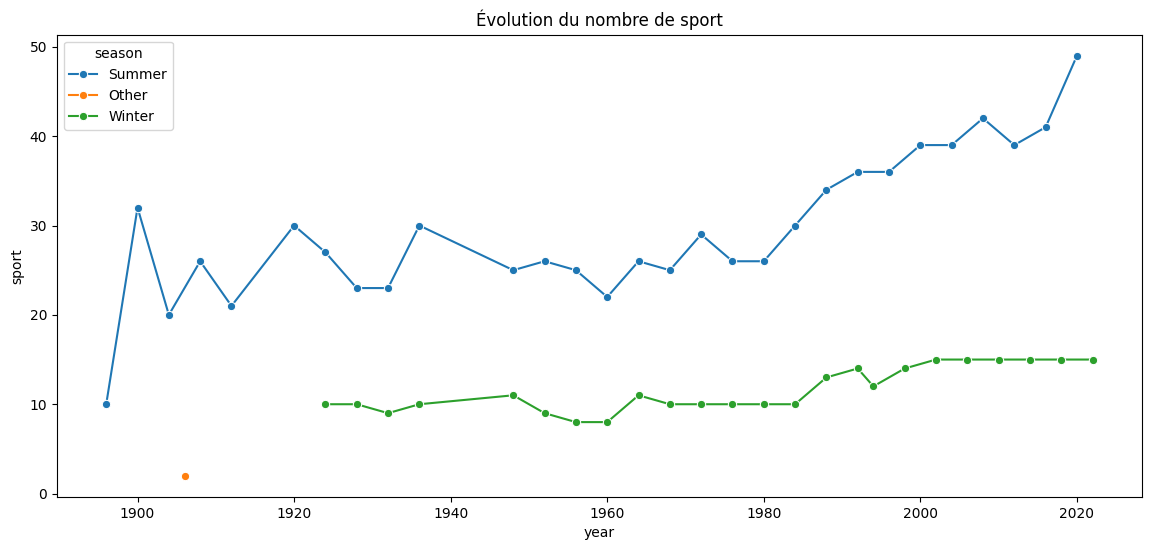

In [200]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_nb_sport,
             x='year', 
             y='sport', 
             hue='season', 
            marker="o", 
)
plt.title("Évolution du nombre de sport")
plt.show()

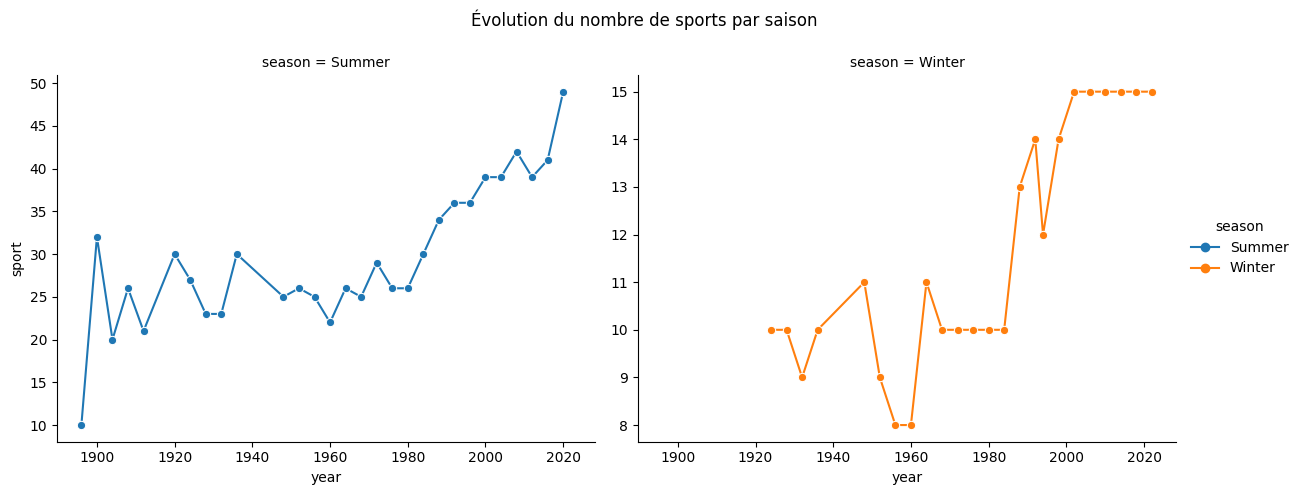

In [201]:
df_filtered = df_nb_sport[df_nb_sport['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='sport', 
    col='season', # Crée un graphique par saison
    hue='season', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

### Evolution du nombre d'epreuves

In [202]:
df_nb_event = df_bio_result_merged.groupby(['year','season'])['event'].nunique().reset_index()
df_nb_event.head(3)

,year,season,event
0,1896,Summer,43
1,1900,Summer,226
2,1904,Summer,164


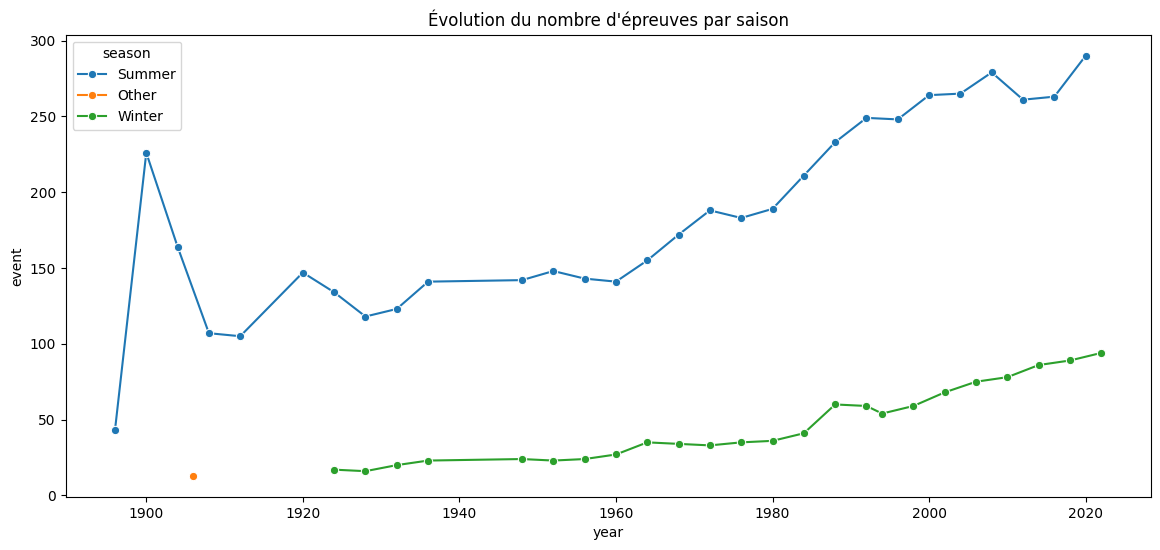

In [203]:
plt.figure(figsize=(14,6))

sns.lineplot(data=df_nb_event,
             x='year',
             y='event',
             hue='season',
             marker="o", 
)

plt.title("Évolution du nombre d'épreuves par saison")
plt.show()

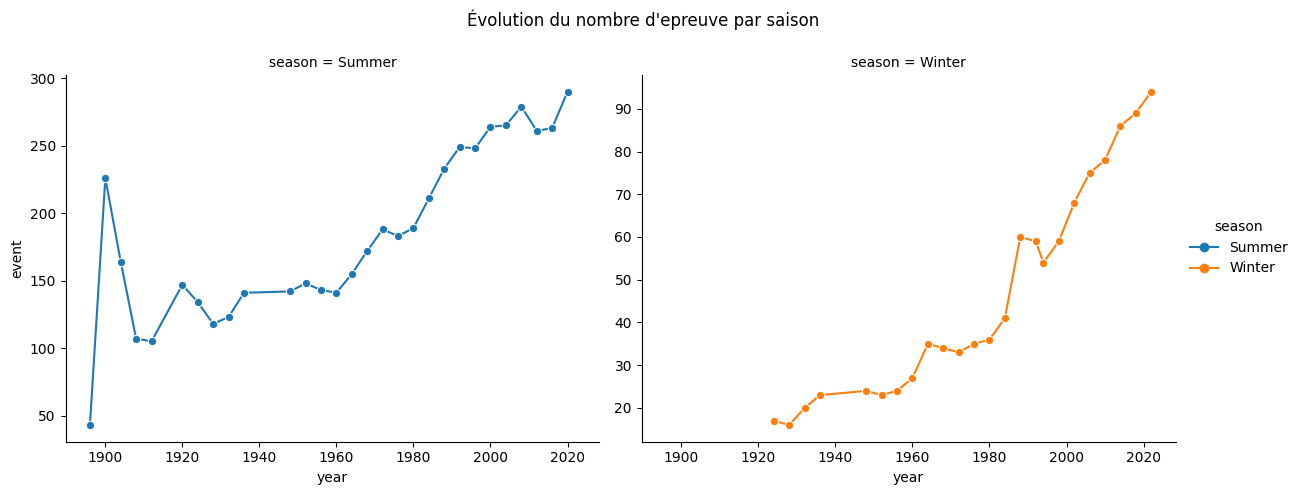

In [204]:
df_filtered = df_nb_event[df_nb_event['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='event', 
    col='season', # Crée un graphique par saison
    hue='season', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre d'epreuve par saison")
plt.show()

### Répartition des épreuves individuelles et collectives

In [205]:
df_nb_sport_co_indiv = df_bio_result_merged.groupby(['year','season', 'collective_sport'])['event'].nunique().reset_index()
df_nb_sport_co_indiv.head(3)

,year,season,collective_sport,event
0,1896,Summer,Collective,3
1,1896,Summer,Individual,40
2,1900,Summer,Collective,66


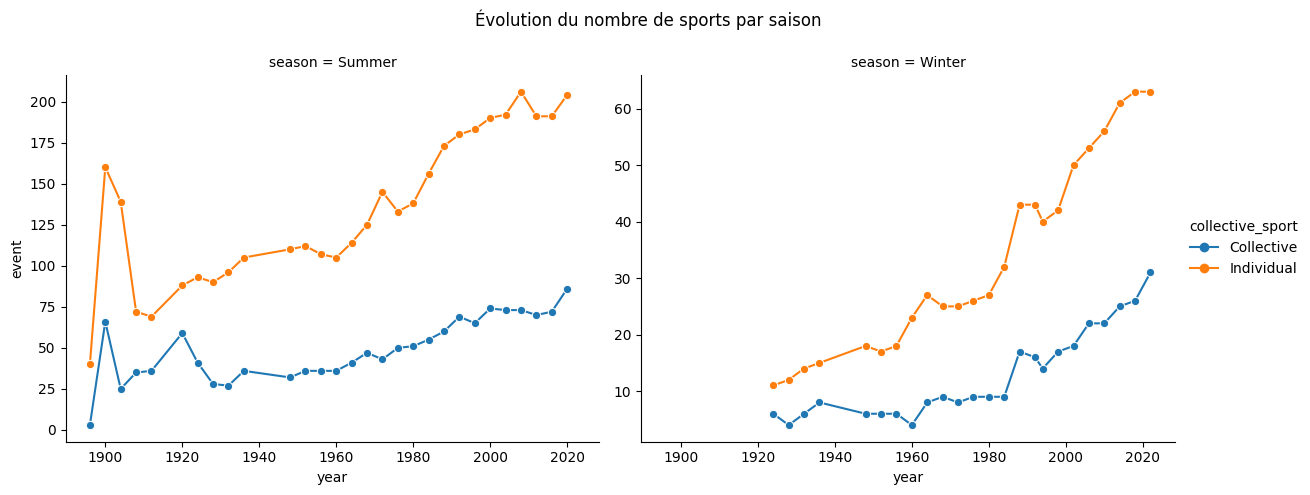

In [206]:
df_filtered = df_nb_sport_co_indiv[df_nb_sport_co_indiv['season'].isin(['Summer', 'Winter'])]

sns.relplot(
    data=df_filtered,
    x='year', 
    y='event', 
    col='season', # Crée un graphique par saison
    hue='collective_sport', 
    kind='line', 
    marker="o", 
    height=5, 
    aspect=1.2,
    facet_kws={'sharey': False}  # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

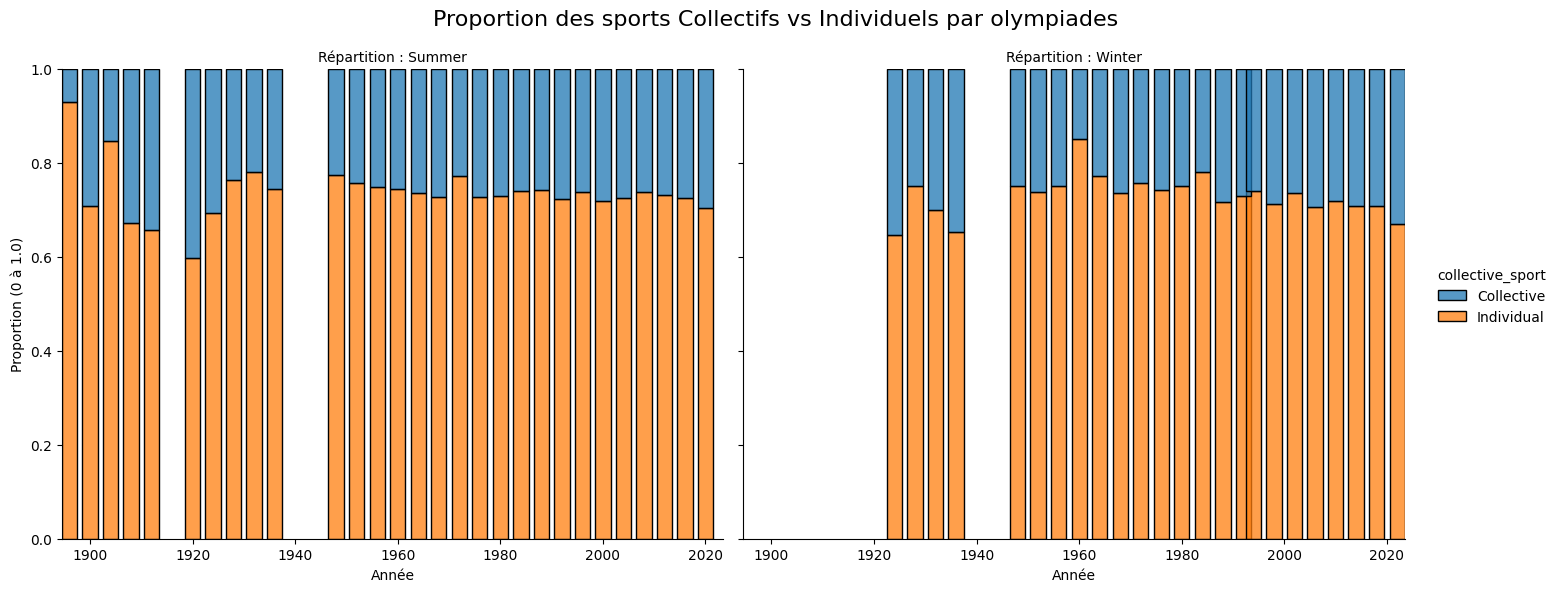

In [207]:
# 2. Utilisation de displot pour le mode "fill" (proportion)
g = sns.displot(
    data=df_filtered,
    x='year',
    weights='event',          # On utilise le nombre de sports comme "poids"
    hue='collective_sport',
    col='season',
    kind='hist',              # On précise qu'on veut un histogramme
    multiple='fill',          # <--- C'est l'option magique pour le 100% empilé
    discrete=True,            # Pour avoir une barre par année
    shrink=3,               # Pour laisser un petit espace entre les barres
    height=6,
    aspect=1.2)

# 3. Cosmétique
g.set_axis_labels("Année", "Proportion (0 à 1.0)")
g.set_titles("Répartition : {col_name}")

# On ajuste le titre général
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Proportion des sports Collectifs vs Individuels par olympiades", fontsize=16)

plt.show()

### Evolution du nombre total de médailles par an

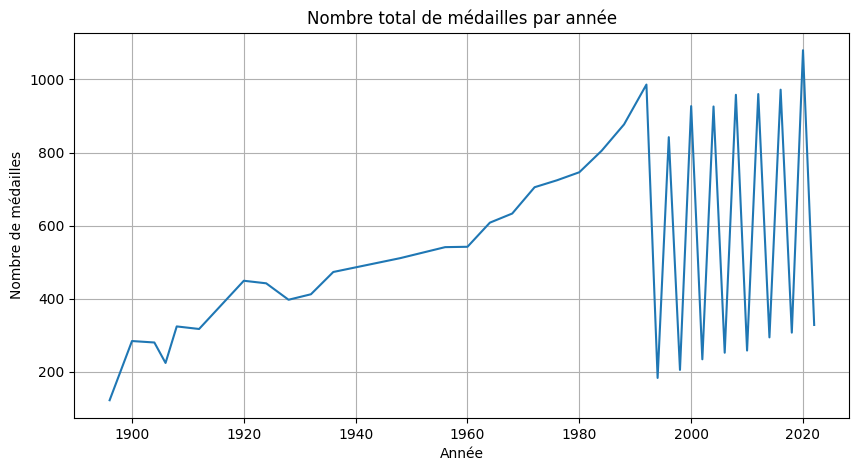

In [208]:
medals = df_medal["total"]

medals_per_year = (
    df_medal
    .groupby("year", as_index=False)["total"]
    .sum()
    .rename(columns={"total": "medal_count"})
)

plt.figure(figsize=(10,5))
plt.plot(medals_per_year["year"], medals_per_year["medal_count"])
plt.title("Nombre total de médailles par année")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.grid(True)
plt.show()

### Evolution médailles pour les JO d'été et d'hiver

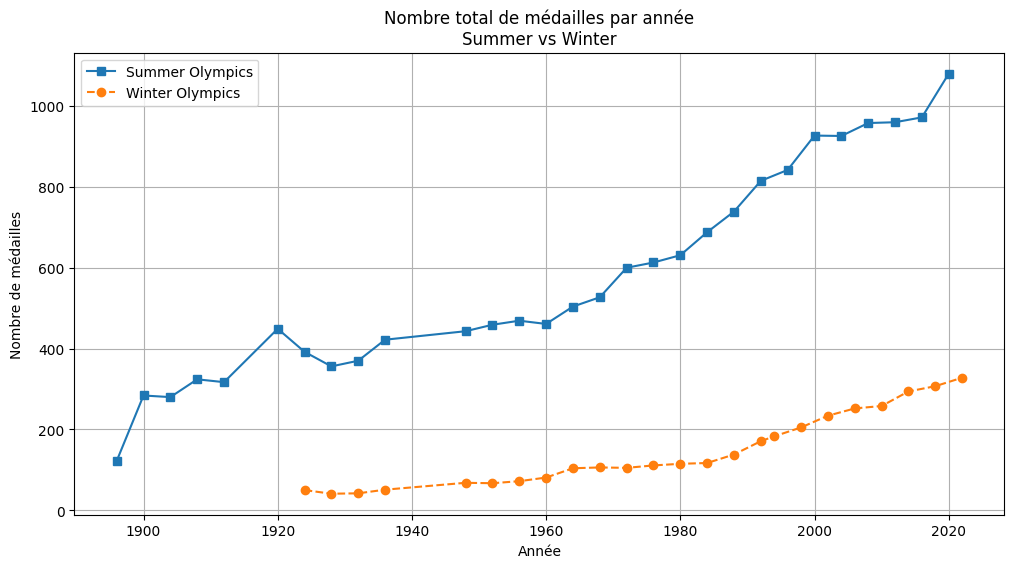

In [209]:
df_medal_season = df_medal.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

medals_per_year_season = (
    df_medal_season
    .groupby(["year", "season"], as_index=False)["total"]
    .sum()
    .rename(columns={"total": "medal_count"})
)

summer_medals = medals_per_year_season[medals_per_year_season["season"] == "Summer"]
winter_medals = medals_per_year_season[medals_per_year_season["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer_medals["year"],
    summer_medals["medal_count"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_medals["year"],
    winter_medals["medal_count"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Nombre total de médailles par année\nSummer vs Winter")
plt.xlabel("Année")
plt.ylabel("Nombre de médailles")
plt.legend()
plt.grid(True)
plt.show()


### Evolution du nombre de pays participants

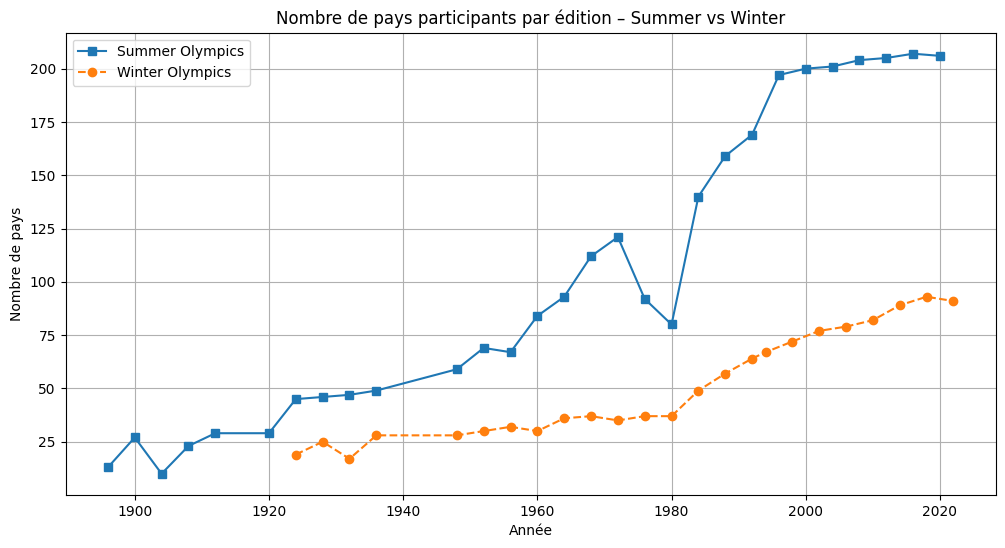

In [210]:
countries_per_edition = (
    df_athlete_result
    .groupby(["edition_id", "edition_year"])["country_noc"]
    .nunique()
    .reset_index(name="num_countries")
)

countries_per_edition = countries_per_edition.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

summer = countries_per_edition[countries_per_edition["season"] == "Summer"]
winter = countries_per_edition[countries_per_edition["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer["edition_year"],
    summer["num_countries"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter["edition_year"],
    winter["num_countries"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Nombre de pays participants par édition – Summer vs Winter")
plt.xlabel("Année")
plt.ylabel("Nombre de pays")
plt.legend()
plt.grid(True)
plt.show()

### Nombre total de médailles par pays

In [211]:
df_medal = df_medal.rename(columns = {'country_noc': 'noc'})

In [212]:
# 1- Identifier la clé de jointure : "noc"
# 2- Selectionner les colonnes nécessaires : "noc" et 'continent 
# 3- Effectuer la jointure avec la fonction merge()

# Créer new df avec les colonnes necessaires pour le merge
# (noc et continent) et supprimer les doublons
df_country_continent = df_country[['noc', 'continent']].drop_duplicates()

# Joindre 
# left merge p
df_medal = df_medal.merge(
    df_country_continent,
    on='noc',
    how='left'
)

# Vérifier le résultat en visualisant le DataFrame 
print(df_medal.head())

                edition  edition_id  year        country  noc  gold  silver  \
0  1896 Summer Olympics           1  1896      Australia  AUS     2       0   
1  1896 Summer Olympics           1  1896        Austria  AUT     2       1   
2  1896 Summer Olympics           1  1896        Denmark  DEN     1       2   
3  1896 Summer Olympics           1  1896         France  FRA     5       4   
4  1896 Summer Olympics           1  1896  Great Britain  GBR     2       3   

   bronze  total continent  
0       0      2   Oceania  
1       2      5    Europe  
2       3      6    Europe  
3       2     11    Europe  
4       2      7    Europe  


In [213]:
#Creation de la palette color code HEX anneaux olympiques 

OLYMPIC_RING_COLOR = {
    'Europe': '#0081c8',
    'Asia': '#fcb131',
    'Africa': '#000000',
    'America': '#ee334e',
    'Oceania': '#00a651',
    'Neutral': 'Lightgray'
}

In [214]:
# Aggrégation total des médailles par pays et continent 
df_aggregated = df_medal.groupby(['country', 'continent'])['total'].sum().reset_index()

In [215]:
fig = px.scatter(
    df_aggregated,
    x='total',
    y='country',
    color='continent',                  
    color_discrete_map=OLYMPIC_RING_COLOR,   
    size='total',                       
    hover_data=['total'],               
    title='Overall medal tally by continent',
    labels={'total', 'country', 'continent'}
)

fig.update_layout(
    width=700,
    height=700,
    xaxis_title="Total medals won by country/continent",
    yaxis_title="Country",
    legend_title="Continent",
    xaxis_type="log"
)

fig.show()

### Le nombre de partipants au global

In [216]:
df_athlete_result.head(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,1889,1908,19,GBR,False,1,1
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,1886,1908,22,GBR,False,2,1


In [217]:
#groupby par athlètes et comptage du nombre d'éditions uniques 
df_athlete_participation = df_athlete_result.groupby('athlete')['edition'].nunique().reset_index(name='participations_count')

In [218]:
#aggrégation
df_participation_summary = df_athlete_participation.groupby('participations_count')['athlete'].count().reset_index(name='athlete_count')
df_participation_summary

,participations_count,athlete_count
0,1,111407
1,2,29725
2,3,9321
3,4,2699
4,5,772
5,6,189
6,7,67
7,8,21
8,9,10
9,10,1


In [219]:
df_participation_summary.rename(columns={
    'participations_count': 'Participation_numbers',
    'athlete_count': 'Athlete_numbers'},
     inplace=True
)
df_participation_summary

,Participation_numbers,Athlete_numbers
0,1,111407
1,2,29725
2,3,9321
3,4,2699
4,5,772
5,6,189
6,7,67
7,8,21
8,9,10
9,10,1


In [220]:
fig = px.bar(
    df_participation_summary,
    x='Participation_numbers', 
    y='Athlete_numbers',
    title="Athlètes et Nombre d'Éditions Olympiques Participées",
    labels={
        'Participation_numbers': "Nombre d'éditions Olympiques (Jeux) Participées", 
        'Athlete_numbers': "Nombre d'Athlètes"
    },
   
    color='Athlete_numbers',
    color_continuous_scale=px.colors.sequential.Viridis 
)

fig.update_layout(
    xaxis_title="Nombre d'Éditions (Jeux)",
    yaxis_title="Nombre d'Athlètes",
    xaxis={'type': 'category'}, 
    width=1000,
    height=600
)

# CORRECTION 2 : Utiliser le nom de colonne correct pour le texte
fig.update_traces(text=df_participation_summary['Athlete_numbers'], textposition='outside')

fig.show()

## 2. Performance des pays

### Le top 10 des pays qui ont récoltés le plus de médailles

<Axes: ylabel='total'>

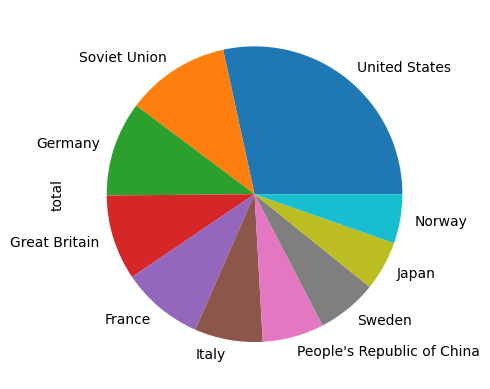

In [221]:
df_medal.sample(3)

country_medals_alltime = df_medal.groupby('country')['total'].sum()
country_medals_alltime.head()

country_medals_top10 = country_medals_alltime.nlargest(10)
country_medals_top10

country_medals_top10.plot.pie()

In [222]:
# TOP 10 MEDAL-WINNING COUNTRIES

df_top_countries = df_medal.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum().reset_index()

df_top_10 = df_top_countries.sort_values(by='total', ascending=False).head(10)

# Creation de la color palette : Codes HEX métal médailles

OLYMPIC_MEDAL_COLOR = {
    'gold': '#d6af36',
    'silver': '#a7a7ad',
    'bronze': '#a77044'
}

fig = px.bar(
    df_top_10,
    x=['gold', 'silver', 'bronze'], 
    y='country',                      
    orientation='h',                  # Graphique en barres horizontales
    title='Top 10 Medal-winning countries',
    labels={'value': 'Nombre de Médailles', 'country': 'Pays', 'variable': 'Type de Médaille'},
    color_discrete_map= OLYMPIC_MEDAL_COLOR
)    

fig.update_layout(
    xaxis_title="Total number of medals",
    yaxis_title="Country",
    legend_title="Medal metal",
    # Pour que le Top 10 soit dans l'ordre du plus grand au plus petit (en haut)
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

### Quelle est la répartition des médailles pour ce top 10 ?

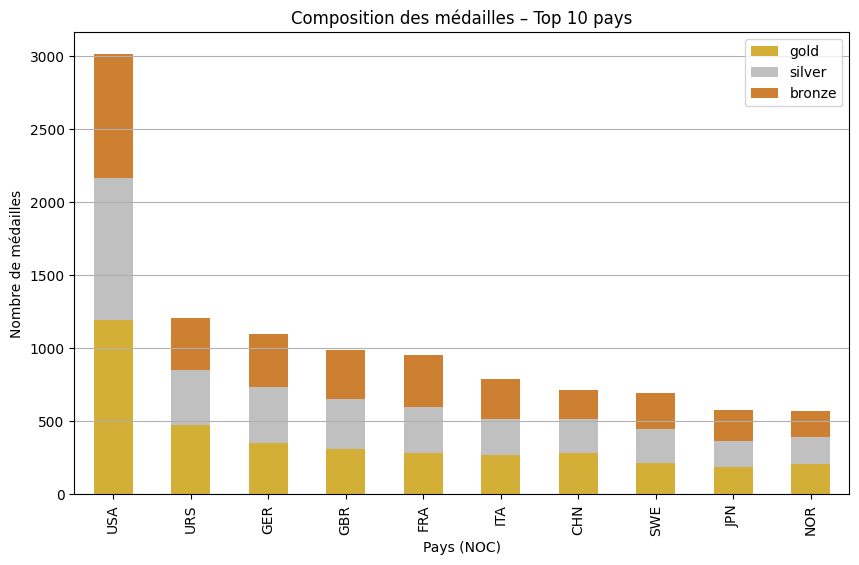

In [225]:
top10_countries = (
    df_medal
    .groupby("noc", as_index=False)["total"]
    .sum()
    .sort_values("total", ascending=False)
    .head(10)["noc"]
)

top10_medals = (
    df_medal[df_medal["noc"].isin(top10_countries)]
    .groupby("noc", as_index=False)
    .sum()
    .set_index("noc")[["gold", "silver", "bronze", "total"]]
)

top10_medals_sorted = top10_medals.sort_values("total", ascending=False)

colors = {
    "gold":   "#D4AF37",
    "silver": "#C0C0C0",
    "bronze": "#CD7F32"
}

top10_medals_sorted[["gold", "silver", "bronze"]].plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)

plt.title("Composition des médailles – Top 10 pays")
plt.xlabel("Pays (NOC)")
plt.ylabel("Nombre de médailles")
plt.grid(axis="y")
plt.show()

### Ratio des pays ayant gagnés au moins une médaille ?

In [228]:
df_medailles = df_bio_result_merged[df_bio_result_merged['medal'] != 'nan']

tous_les_pays = set(df_bio_result_merged['country_noc'].unique())
pays_medailles = set(df_medailles['country_noc'].unique())
pays_sans_medailles = tous_les_pays - pays_medailles

print(f"Nombre total de pays ayant participé : {len(tous_les_pays)}")
print(f"Nombre de pays ayant remporté au moins une médaille : {len(pays_medailles)}")
print(f"Nombre de pays n'ayant jamais remporté de médaille : {len(pays_sans_medailles)}")

Nombre total de pays ayant participé : 231
Nombre de pays ayant remporté au moins une médaille : 154
Nombre de pays n'ayant jamais remporté de médaille : 77


In [229]:
print(sorted(list(pays_sans_medailles)))

['ALB', 'AND', 'ANG', 'ANT', 'ARU', 'ASA', 'BAN', 'BEN', 'BHU', 'BIH', 'BIZ', 'BOL', 'BRU', 'CAF', 'CAM', 'CAY', 'CGO', 'CHA', 'COD', 'COK', 'COM', 'COR', 'CPV', 'CRT', 'DMA', 'EOR', 'ESA', 'FSM', 'GAM', 'GBS', 'GEQ', 'GUI', 'GUM', 'HON', 'IVB', 'KIR', 'LAO', 'LBA', 'LBR', 'LCA', 'LES', 'MAD', 'MAL', 'MAW', 'MDV', 'MHL', 'MLI', 'MLT', 'MTN', 'MYA', 'NBO', 'NCA', 'NRU', 'OMA', 'PLE', 'PLW', 'PNG', 'RHO', 'RWA', 'SAA', 'SEY', 'SKN', 'SLE', 'SOL', 'SOM', 'SSD', 'STP', 'SWZ', 'TLS', 'TUV', 'UNK', 'VAN', 'VIN', 'VNM', 'YAR', 'YEM', 'YMD']


In [230]:
data_medal_ratio = {
    'Statut':['Pays Médaillés', 'Pays non médaillés'],
    'Nombre de Pays':[len(pays_medailles), len(pays_sans_medailles)]
}

df_medal_ratio = pd.DataFrame(data_medal_ratio)

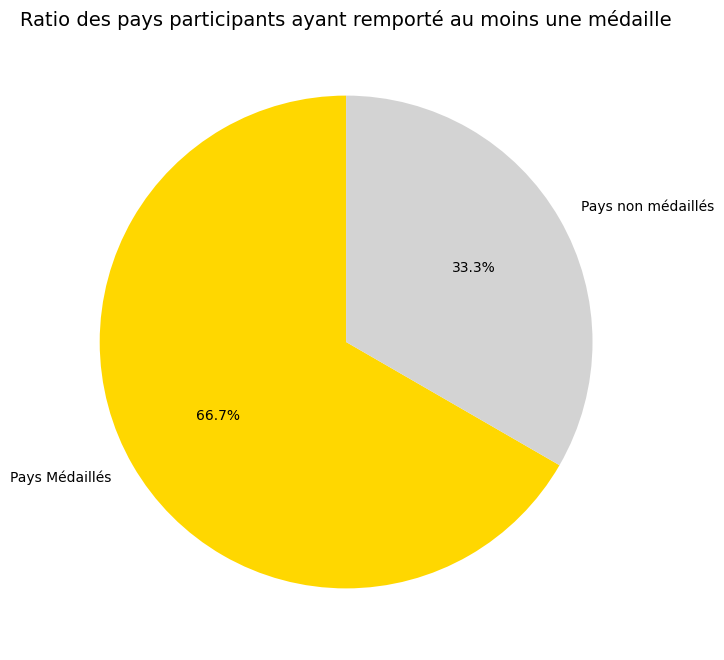

In [231]:
# Configuration de la figure
plt.figure(figsize=(8, 8))

# Création du diagramme circulaire
plt.pie(
    df_medal_ratio['Nombre de Pays'],
    labels=df_medal_ratio['Statut'],
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['gold', 'lightgrey']
)

plt.title('Ratio des pays participants ayant remporté au moins une médaille', fontsize=14)

plt.show()

### Top 20 des pays les plus médaillés dans les sports individuels

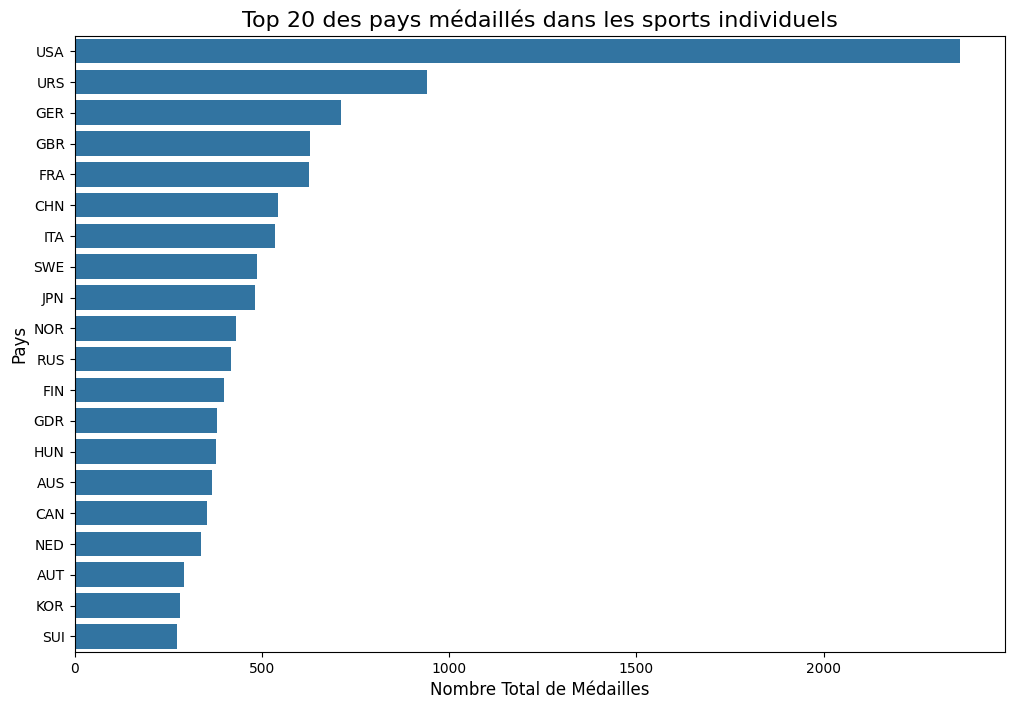

In [232]:
df_individual_sport = df_bio_result_merged[df_bio_result_merged['collective_sport'] == 'Individual']

df_medailles_individual = df_individual_sport[df_individual_sport['medal'] != 'nan']

resultat_medailles_indiv_country = df_medailles_individual.groupby('country_noc').size().reset_index(name='nombre_de_medailles_indiv_par_pays')

top20_resultat_medailles_indiv_country = resultat_medailles_indiv_country.nlargest(20, columns="nombre_de_medailles_indiv_par_pays")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_indiv_par_pays", # La longueur des barres (l'axe des x)
    y='country_noc',              # Les catégories (l'axe des y)
    data=top20_resultat_medailles_indiv_country
)

plt.title("Top 20 des pays médaillés dans les sports individuels", fontsize=16)
plt.xlabel("Nombre Total de Médailles", fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.show()

### Top 30 pays: répartion des médailles individuels et collectives

In [233]:
df_collective_sport = df_bio_result_merged[(df_bio_result_merged['collective_sport'] == 'Collective')]

df_collective_sport_medals = df_collective_sport[df_collective_sport['medal'] != 'nan']

df_medailles_collectives_unique = df_collective_sport_medals.groupby(['edition_id','sport', 'event', 'country_noc', 'medal']).size().reset_index(name='compte_medaille_athletes')

resultat_medailles_collectives = df_medailles_collectives_unique.groupby(
    ['country_noc', 'event', 'sport']
).size().reset_index(name='nombre_total_de_medailles_collectives')

resultat_medailles_collectives_par_pays = resultat_medailles_collectives.groupby('country_noc').sum()
resume_medailles_collectives_par_pays = resultat_medailles_collectives_par_pays.drop(columns=['event', 'sport'], axis=1)

#Fusionner les deux DataFrames sur la colonne du code pays
df_medailles_combinees = pd.merge(
    resume_medailles_collectives_par_pays,
    resultat_medailles_indiv_country,
    on='country_noc',
    how='outer'
)

df_medailles_combinees['nombre_total_de_medailles_collectives'] = df_medailles_combinees['nombre_total_de_medailles_collectives'].astype('Int64')
df_medailles_combinees['nombre_de_medailles_indiv_par_pays'] = df_medailles_combinees['nombre_de_medailles_indiv_par_pays'].astype('Int64')

In [234]:
df_plot = df_medailles_combinees.copy()
df_plot['Total'] = df_plot['nombre_total_de_medailles_collectives'] + df_plot['nombre_de_medailles_indiv_par_pays']

df_plot.rename(columns={
    'nombre_total_de_medailles_collectives': 'Collectives', 
    'nombre_de_medailles_indiv_par_pays': 'Individuelles'
}, inplace=True)

df_top_pays_empile = df_plot.sort_values(by='Total', ascending=False).head(30) 

df_plot_long = pd.melt(
    df_top_pays_empile,
    id_vars=['country_noc'],
    value_vars=['Individuelles', 'Collectives'],
    var_name='Type_Medaille',
    value_name='Nombre_Medaille'
)
df_plot_long = df_plot_long.sort_values(by='country_noc', ascending=False)

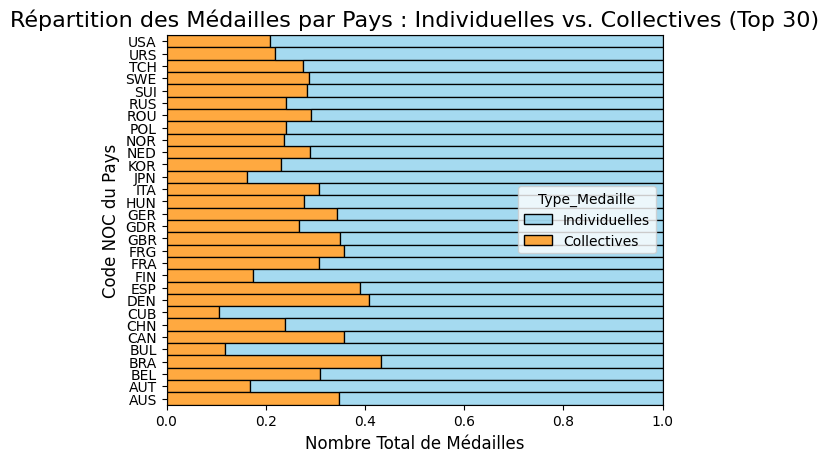

In [235]:
sns.histplot(
    data=df_plot_long,
    y='country_noc',
    weights='Nombre_Medaille', 
    hue='Type_Medaille',
    multiple='fill',
    palette={'Individuelles': 'skyblue', 'Collectives': 'darkorange'},
    edgecolor='black'
)

plt.title(
    'Répartition des Médailles par Pays : Individuelles vs. Collectives (Top 30)',
    fontsize=16
)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Code NOC du Pays', fontsize=12)

plt.show()

### TOP 5 des pays les plus médaillés par continent

In [236]:
df_aggregated_sorted = df_aggregated.sort_values(by='total', ascending=False)

# Limiter au 5 premiers de chaque continent
df_top_5_per_continent = df_aggregated_sorted.groupby('continent').head(5)


fig = px.bar(
    df_top_5_per_continent,
    x='country',                      
    y='total',                        
    color='continent',                # Couleur basée sur le continent
    color_discrete_map=OLYMPIC_RING_COLOR,
    title='Top 5 medal_winning per continent',
    labels={'total': 'Nombre Total de Médailles', 'country': 'Pays', 'continent': 'Continent'}
)

fig.update_layout(
    xaxis_title="Pays",
    yaxis_title="Nombre Total de Médailles",
    legend_title="Continent",
    width=1000,
    height=600
)

fig.update_xaxes(tickangle=45)

fig.show()

### Distribution nombre total de médailles par continent

In [237]:
df_continent_totals = df_aggregated.groupby('continent')['total'].sum().reset_index()

In [238]:
#trier par total
df_continent_totals = df_continent_totals.sort_values(by='total', ascending=False)

In [239]:
fig = px.scatter(
    df_continent_totals,
    x='continent',                     
    y='total',                         
    size='total',                      # La taille de la bulle est proportionnelle au total
    color='continent',                 # La couleur basée sur le continent
    color_discrete_map=OLYMPIC_RING_COLOR, 
    hover_name='continent',            
    text='continent',                  # Affiche le nom du continent DANS la bulle
    size_max=150,                      
    title='Total Olympic medals by continent'
)

fig.update_layout(
    xaxis_title="Continent",
    yaxis_title="Total",
    legend_title="Continent",
    width=900,
    height=600,
)

fig.update_traces(
    textposition='middle center',       
    marker=dict(line=dict(width=2, color='DarkSlateGrey')), 
    mode='markers+text'                 
)

fig.show()

## 3. Médailles : structure & répartition

### Répartition globale des médailles par type

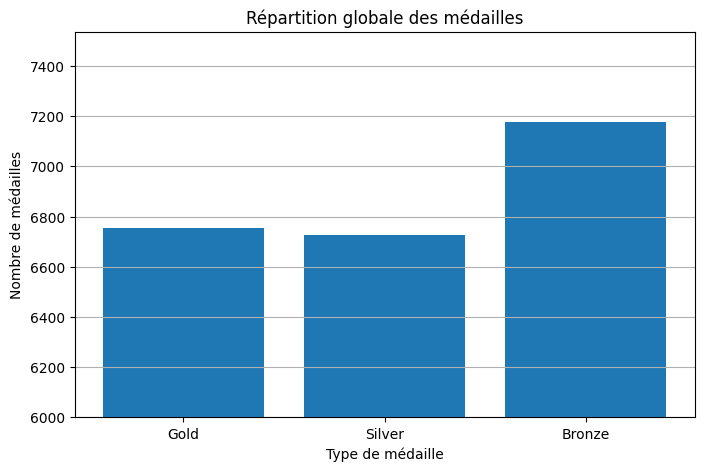

In [240]:
medals_by_type = pd.DataFrame({
    "medal": ["Gold", "Silver", "Bronze"],
    "count": [
        df_medal["gold"].sum(),
        df_medal["silver"].sum(),
        df_medal["bronze"].sum()
    ]
})

plt.figure(figsize=(8,5))
plt.bar(medals_by_type["medal"], medals_by_type["count"])
plt.title("Répartition globale des médailles")
plt.xlabel("Type de médaille")
plt.ylabel("Nombre de médailles")
plt.ylim(6000, None)
plt.grid(axis="y")

### Les athlètes les plus médaillés de l’histoire

In [244]:
df_medal

,edition,edition_id,year,country,noc,gold,silver,bronze,total,continent
0,1896 Summer Olympics,1,1896,Australia,AUS,2,0,0,2,Oceania
1,1896 Summer Olympics,1,1896,Austria,AUT,2,1,2,5,Europe
2,1896 Summer Olympics,1,1896,Denmark,DEN,1,2,3,6,Europe
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11,Europe
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,Europe
...,...,...,...,...,...,...,...,...,...,...
1796,2022 Winter Olympics,62,2022,Switzerland,SUI,7,2,6,15,Europe
1797,2022 Winter Olympics,62,2022,Slovakia,SVK,1,0,1,2,None
1798,2022 Winter Olympics,62,2022,Sweden,SWE,8,5,5,18,Europe
1799,2022 Winter Olympics,62,2022,Ukraine,UKR,0,1,0,1,Europe


In [246]:
medals_countrys_per_edition = df_medal.groupby(['year', 'noc'])['total'].sum()

jo_attribution = df_games['country_noc'].value_counts()

df_bio_result_merged['medal'].value_counts()

## Prise en compte des seules lignes "gold", "silver", "bronze".
df_medailles = df_bio_result_merged[df_bio_result_merged['medal'] != 'nan']

## Utilisation de la méthode .size pour compter les lignes de chaque athlète.
resultat_medailles = df_medailles.groupby('athlete').size().reset_index(name='nombre_de_medailles')

## Méthode pour avoir le Top 20 des athlètes ayant obtenu une médaille.
top_20_medals = resultat_medailles.nlargest(20, columns='nombre_de_medailles') 

### Top 20 des athletes les plus médaillés

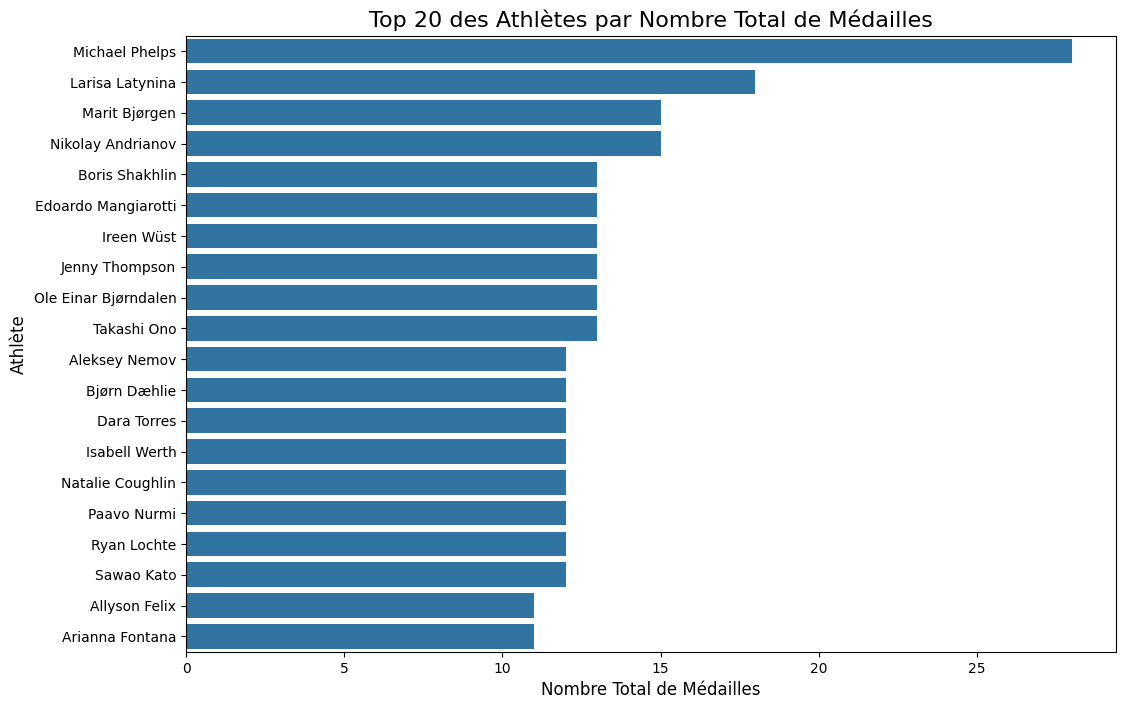

In [247]:
plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

# 3. Créer le diagramme à barres horizontales
sns.barplot(
    x='nombre_de_medailles', # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top_20_medals
)

# 4. Ajouter les titres et étiquettes pour la clarté
plt.title('Top 20 des Athlètes par Nombre Total de Médailles', fontsize=16)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Athlète', fontsize=12)

plt.show()

### Top 20 des athletes les plus titrés

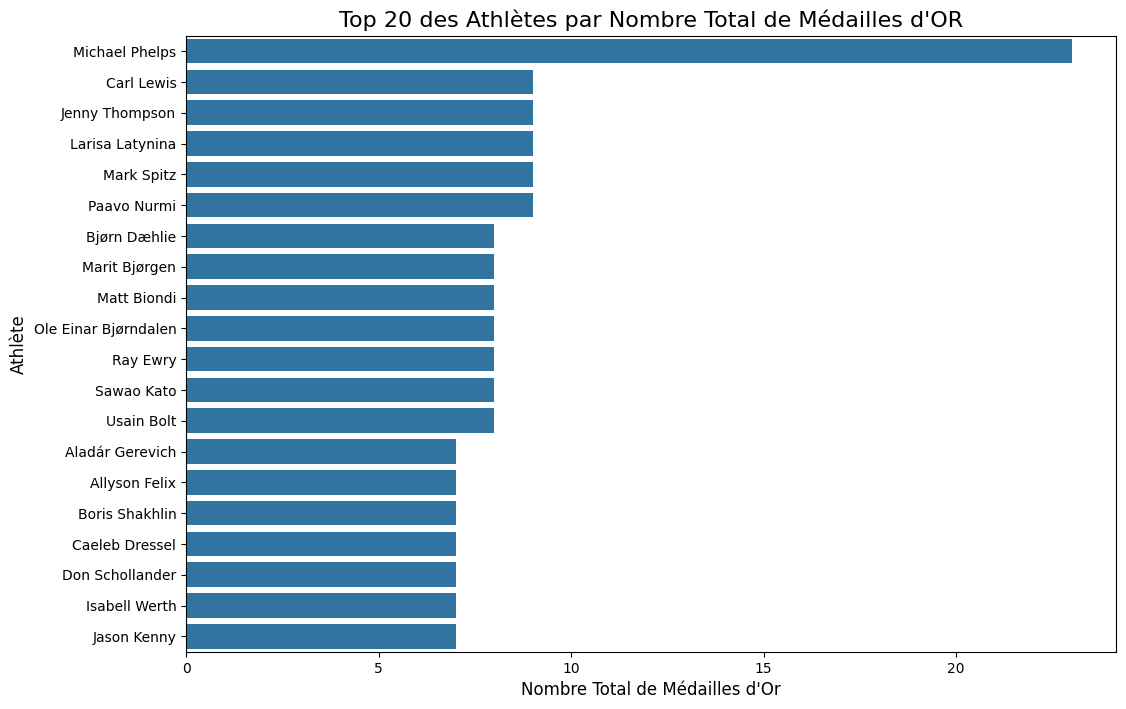

In [248]:
df_gold_medal = df_bio_result_merged[df_bio_result_merged['medal'] == 'Gold']

gold_medal_only = df_gold_medal.groupby('athlete').size().reset_index(name="nombre_de_medailles_d'or")

top20_gold_medal_only = gold_medal_only.nlargest(20, columns="nombre_de_medailles_d'or")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_d'or", # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top20_gold_medal_only
)

plt.title("Top 20 des Athlètes par Nombre Total de Médailles d'OR", fontsize=16)
plt.xlabel("Nombre Total de Médailles d'Or", fontsize=12)
plt.ylabel('Athlète', fontsize=12)
plt.show()

### Top 20 des athletes français les plus médaillés

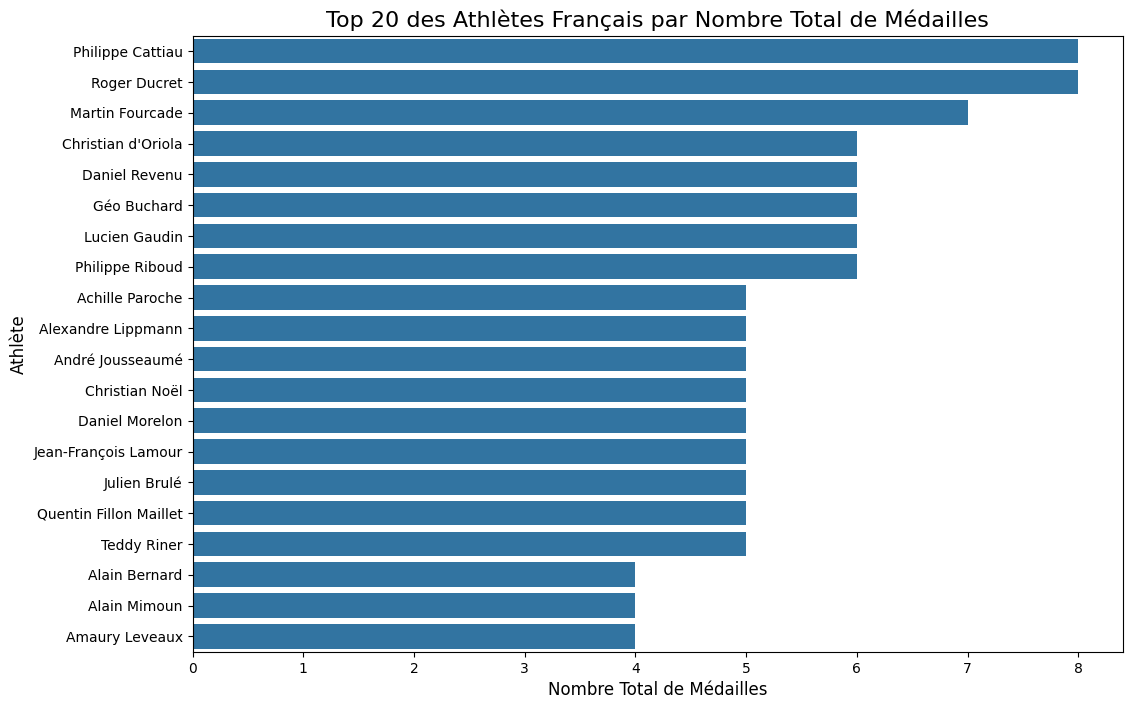

In [249]:
# Filtrer pour obtenir uniquement les médailles remportées par la France
df_medailles_france = df_bio_result_merged[
    (df_bio_result_merged['medal'] != 'nan') & 
    (df_bio_result_merged['country_noc'] == 'FRA')
]

# Grouper par athlète et compter le nombre de médailles
resultat_medailles_france = df_medailles_france.groupby('athlete').size().reset_index(name='nombre_de_medailles')

top_20_medals_fra = resultat_medailles_france.nlargest(20, columns = 'nombre_de_medailles')

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x='nombre_de_medailles', # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top_20_medals_fra         # Une palette de couleurs (peut être changée)
)

plt.title('Top 20 des Athlètes Français par Nombre Total de Médailles', fontsize=16)
plt.xlabel('Nombre Total de Médailles', fontsize=12)
plt.ylabel('Athlète', fontsize=12)

plt.show()

### Top 20 des athletes français les plus titrés

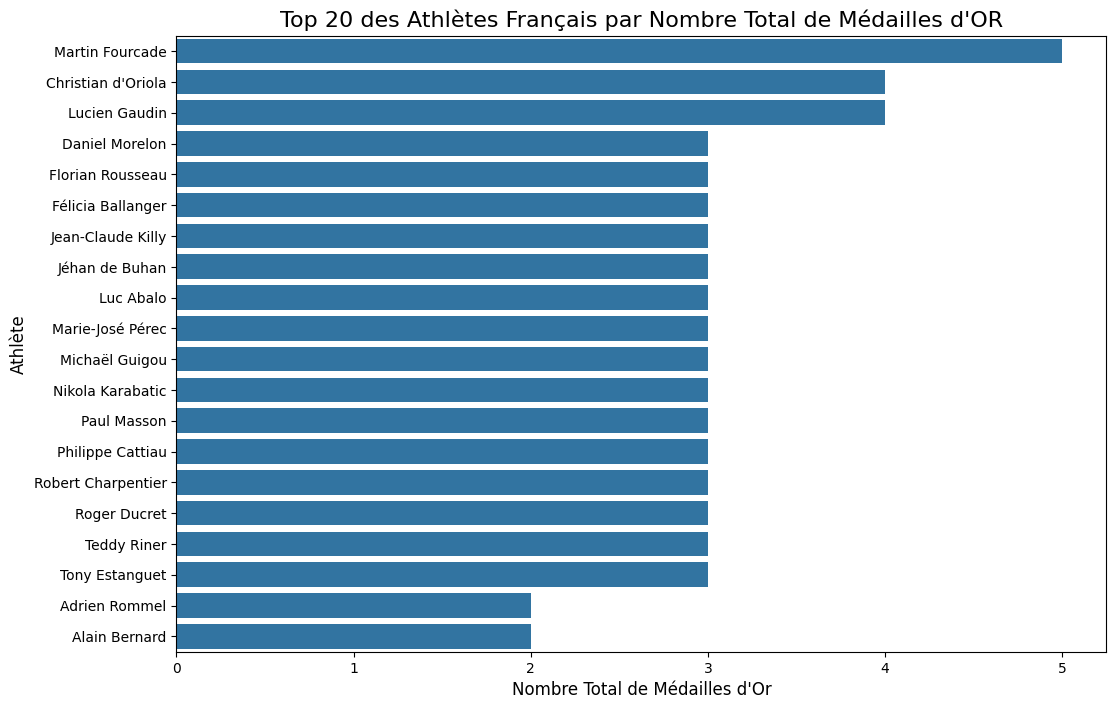

In [250]:
df_gold_medal_fra = df_bio_result_merged[(df_bio_result_merged['medal'] == 'Gold') & (df_bio_result_merged['country_noc'] == 'FRA')]

gold_medal_only_fra = df_gold_medal_fra.groupby('athlete').size().reset_index(name="nombre_de_medailles_d'or")

top20_gold_medal_only_fra = gold_medal_only_fra.nlargest(20, columns="nombre_de_medailles_d'or")

plt.figure(figsize=(12, 8)) # Ajuster la taille pour une meilleure lisibilité

sns.barplot(
    x="nombre_de_medailles_d'or", # La longueur des barres (l'axe des x)
    y='athlete',              # Les catégories (l'axe des y)
    data=top20_gold_medal_only_fra
)

plt.title("Top 20 des Athlètes Français par Nombre Total de Médailles d'OR", fontsize=16)
plt.xlabel("Nombre Total de Médailles d'Or", fontsize=12)
plt.ylabel('Athlète', fontsize=12)
plt.show()

## 4. Les athlètes

### Distribution du nombre d’éditions disputées par athlète

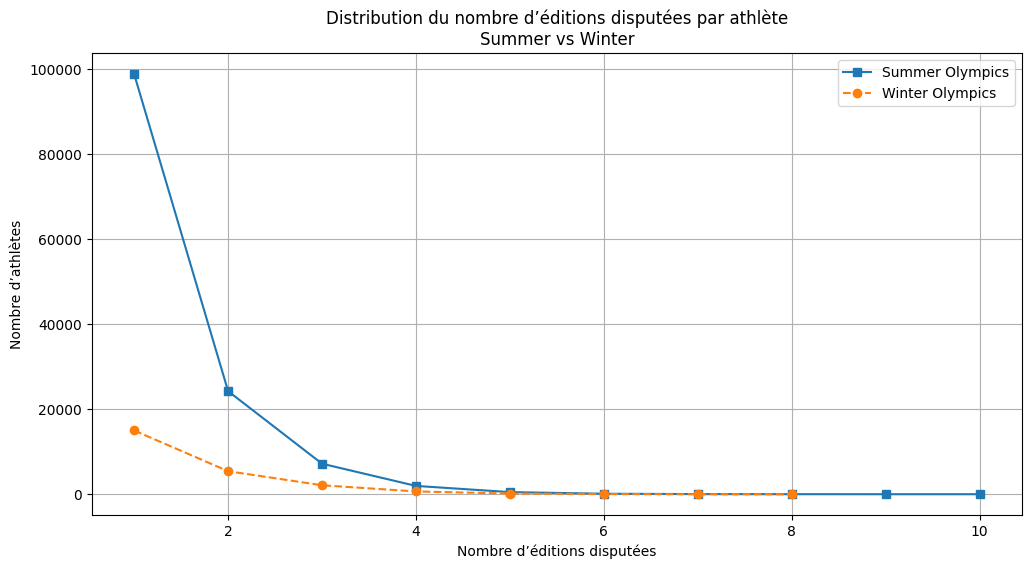

In [252]:
df_age = df_athlete_result.merge(
    df_games[["edition_id", "season"]],
    on="edition_id",
    how="left"
)

editions_per_athlete = (
    df_age
    .groupby(["athlete_id", "season"])["edition_id"]
    .nunique()
    .reset_index(name="num_editions")
)

distribution = (
    editions_per_athlete
    .groupby(["season", "num_editions"])
    .size()
    .reset_index(name="num_athletes")
)

summer_dist = distribution[distribution["season"] == "Summer"]
winter_dist = distribution[distribution["season"] == "Winter"]

plt.figure(figsize=(12,6))

plt.plot(
    summer_dist["num_editions"],
    summer_dist["num_athletes"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_dist["num_editions"],
    winter_dist["num_athletes"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Distribution du nombre d’éditions disputées par athlète\nSummer vs Winter")
plt.xlabel("Nombre d’éditions disputées")
plt.ylabel("Nombre d’athlètes")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\maxbr\AppData\Local\Temp\ipykernel_17888\161454789.py:7: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.

C:\Users\maxbr\AppData\Local\Temp\ipykernel_17888\161454789.py:7: FutureWarning:



The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.




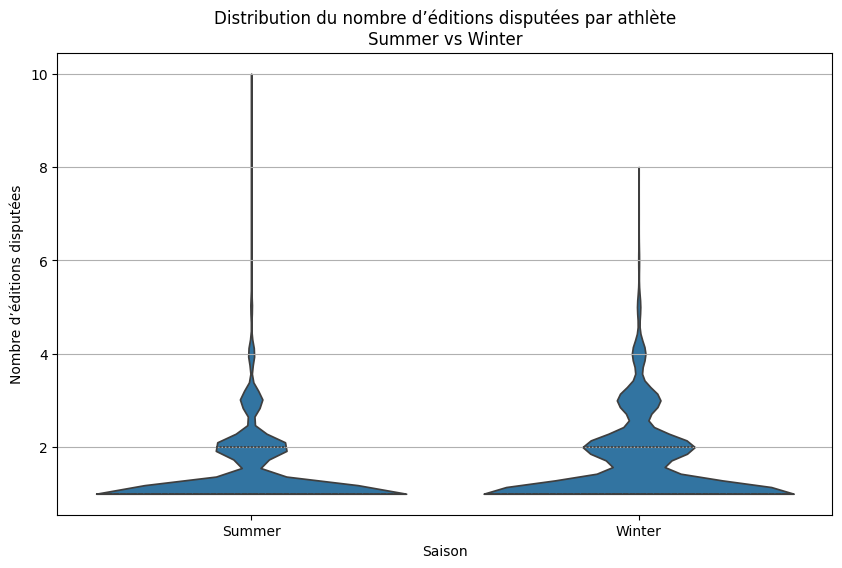

In [253]:
violin_data = editions_per_athlete[
    editions_per_athlete["season"].isin(["Summer", "Winter"])
]

plt.figure(figsize=(10,6))

sns.violinplot(
    data=violin_data,
    x="season",
    y="num_editions",
    inner="quartile",
    cut=0,
    bw=0.3,          # 🔑 réduit fortement le lissage
    scale="width",
    gridsize=50     # 🔑 meilleure continuité verticale
)

plt.title("Distribution du nombre d’éditions disputées par athlète\nSummer vs Winter")
plt.xlabel("Saison")
plt.ylabel("Nombre d’éditions disputées")
plt.grid(axis="y")
plt.show()

### Evolution de la proportion hommes/femmes ?

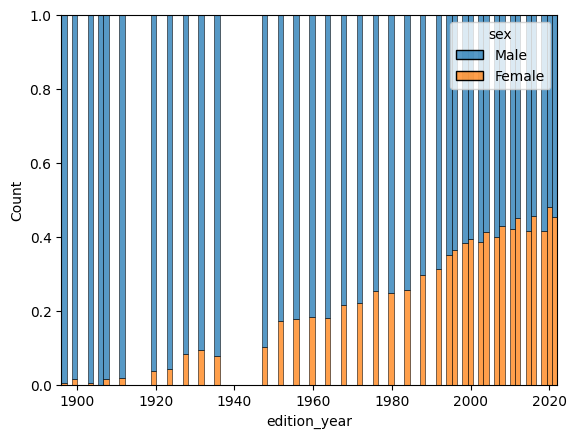

In [254]:
sns.histplot(
    df_bio_result_merged, 
    x = 'edition_year',
    hue = 'sex', 
    multiple='fill'
);

### Âge moyen des athletes par edition

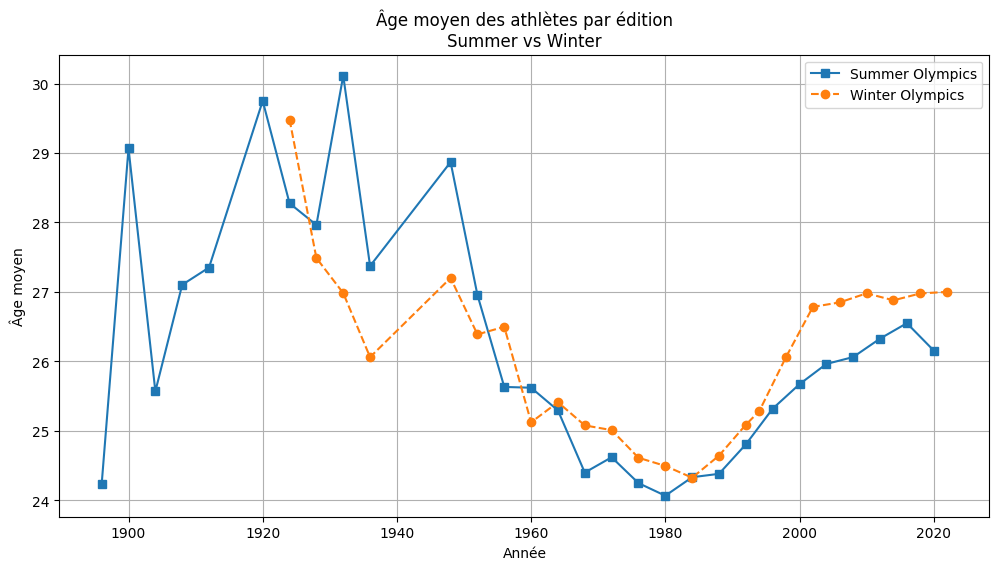

In [255]:
avg_age_year_season = (
    df_age
    .dropna(subset=["age"])
    .groupby(["edition_year", "season"], as_index=False)["age"]
    .mean()
)

summer_age = avg_age_year_season[avg_age_year_season["season"] == "Summer"]
winter_age = avg_age_year_season[avg_age_year_season["season"] == "Winter"]


plt.figure(figsize=(12,6))

plt.plot(
    summer_age["edition_year"],
    summer_age["age"],
    marker="s",
    label="Summer Olympics"
)

plt.plot(
    winter_age["edition_year"],
    winter_age["age"],
    marker="o",
    linestyle="--",
    label="Winter Olympics"
)

plt.title("Âge moyen des athlètes par édition\nSummer vs Winter")
plt.xlabel("Année")
plt.ylabel("Âge moyen")
plt.legend()
plt.grid(True)
plt.show()


### Distribution tailles moyennes des athletes par sexe et saison ?

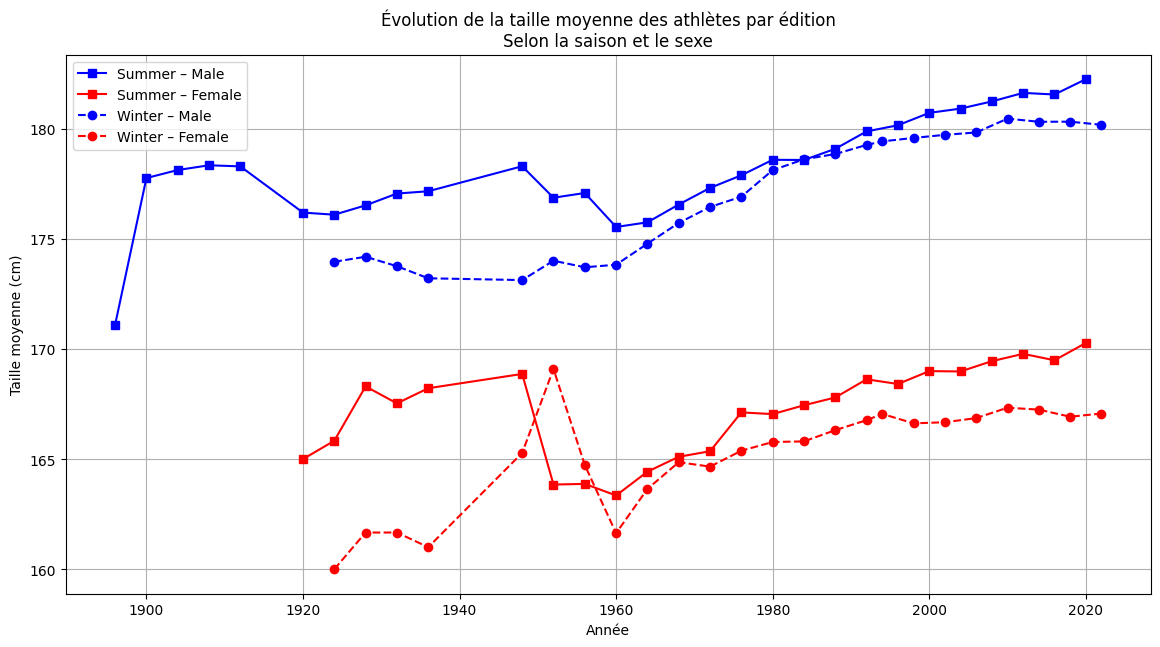

In [256]:
df_morpho = (
    df_athlete_result
    .merge(
        df_bio[["athlete_id", "sex", "height", "weight"]],
        on="athlete_id",
        how="left"
    )
    .merge(
        df_games[["edition_id", "season"]],
        on="edition_id",
        how="left"
    )
)

df_morpho_clean = df_morpho.dropna(subset=["height", "sex"])

avg_height = (
    df_morpho_clean
    .groupby(["edition_year", "season", "sex"], as_index=False)["height"]
    .mean()
)

plt.figure(figsize=(14,7))

marker_map = {
    "Summer": "s",
    "Winter": "o"
}

linestyle_map = {
    "Summer": "-",
    "Winter": "--"
}

color_map = {
    "Male": "blue",
    "Female": "red"
}

for season in ["Summer", "Winter"]:
    for sex in ["Male", "Female"]:
        subset = avg_height[
            (avg_height["season"] == season) &
            (avg_height["sex"] == sex)
        ]
        if not subset.empty:
            plt.plot(
                subset["edition_year"],
                subset["height"],
                marker=marker_map[season],
                linestyle=linestyle_map[season],
                color=color_map[sex],
                label=f"{season} – {sex}"
            )

plt.title("Évolution de la taille moyenne des athlètes par édition\nSelon la saison et le sexe")
plt.xlabel("Année")
plt.ylabel("Taille moyenne (cm)")
plt.legend()
plt.grid(True)
plt.show()

### Profil type du participant

In [257]:
df_bio_result_merged.sample(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
305982,1988 Summer Olympics,22,USA,Rowing,"Eights, Men",159100,John Pescatore,40828,3,Bronze,...,188.0,84.0,23.76641,12.641708,Summer,1988,Sport without weight category,Summer,Collective,Men
238242,1900 Summer Olympics,2,FRA,Tennis,"Doubles, Handicap, Men",925515,Guy de la Chapelle,10,=3,nan,...,NaN,NaN,NaN,NaN,Summer,1900,Sport without weight category,Summer,Collective,Men


In [258]:
profil_type = df_bio_result_merged.groupby(['sport_event_id','sport','event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type.sample(2)

,sport_event_id,sport,event,height,weight,age,imc,ip
450,451,Cycling Track,"Individual Pursuit, Women",169.383333,61.166667,27.787879,21.318326,12.612327
263,264,Canoe Slalom,"Kayak Singles, Slalom, Men",177.897959,72.930612,26.042146,23.038329,12.970893


In [259]:
# On trouve l'index de la ligne avec l'IMC min et max
idx_min = profil_type['imc'].idxmin()
idx_max = profil_type['imc'].idxmax()

# On affiche ces deux lignes uniquement
resultat_extremes = profil_type.loc[[idx_min, idx_max]]

resultat_extremes

,sport_event_id,sport,event,height,weight,age,imc,ip
249,250,Rhythmic Gymnastics,"Individual, Women",165.996212,47.666667,19.461538,17.271299,10.414178
94,95,Weightlifting,"Super-Heavyweight, Men",184.575130,134.195652,27.07619,39.627730,21.562699


In [260]:
resultat_extremes_long = resultat_extremes.melt(
    id_vars=['sport_event_id','sport','event'],
    value_vars=['height', 'weight',	'age',	'imc',	'ip'],
    var_name='attribut',
    value_name='valeur'
)

resultat_extremes_long.head(4)

,sport_event_id,sport,event,attribut,valeur
0,250,Rhythmic Gymnastics,"Individual, Women",height,165.996212
1,95,Weightlifting,"Super-Heavyweight, Men",height,184.57513
2,250,Rhythmic Gymnastics,"Individual, Women",weight,47.666667
3,95,Weightlifting,"Super-Heavyweight, Men",weight,134.195652


In [261]:
fig = px.line_polar(
    resultat_extremes_long,
    r='valeur',
    theta='attribut',
    color='event',
    line_close=True,
    markers=True,
    template='plotly_white',
    #range_r=[0, 10],  # fixe une échelle commune

)

fig.update_traces(
    fill='toself', 
    opacity=0.3)

fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Profil type de l'athlete participant</b>",
        x=0.5,
        y=0.98,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    width=1000,
    height=800
)



fig.show()

In [262]:
resultat_extremes_long.head(4)

,sport_event_id,sport,event,attribut,valeur
0,250,Rhythmic Gymnastics,"Individual, Women",height,165.996212
1,95,Weightlifting,"Super-Heavyweight, Men",height,184.57513
2,250,Rhythmic Gymnastics,"Individual, Women",weight,47.666667
3,95,Weightlifting,"Super-Heavyweight, Men",weight,134.195652


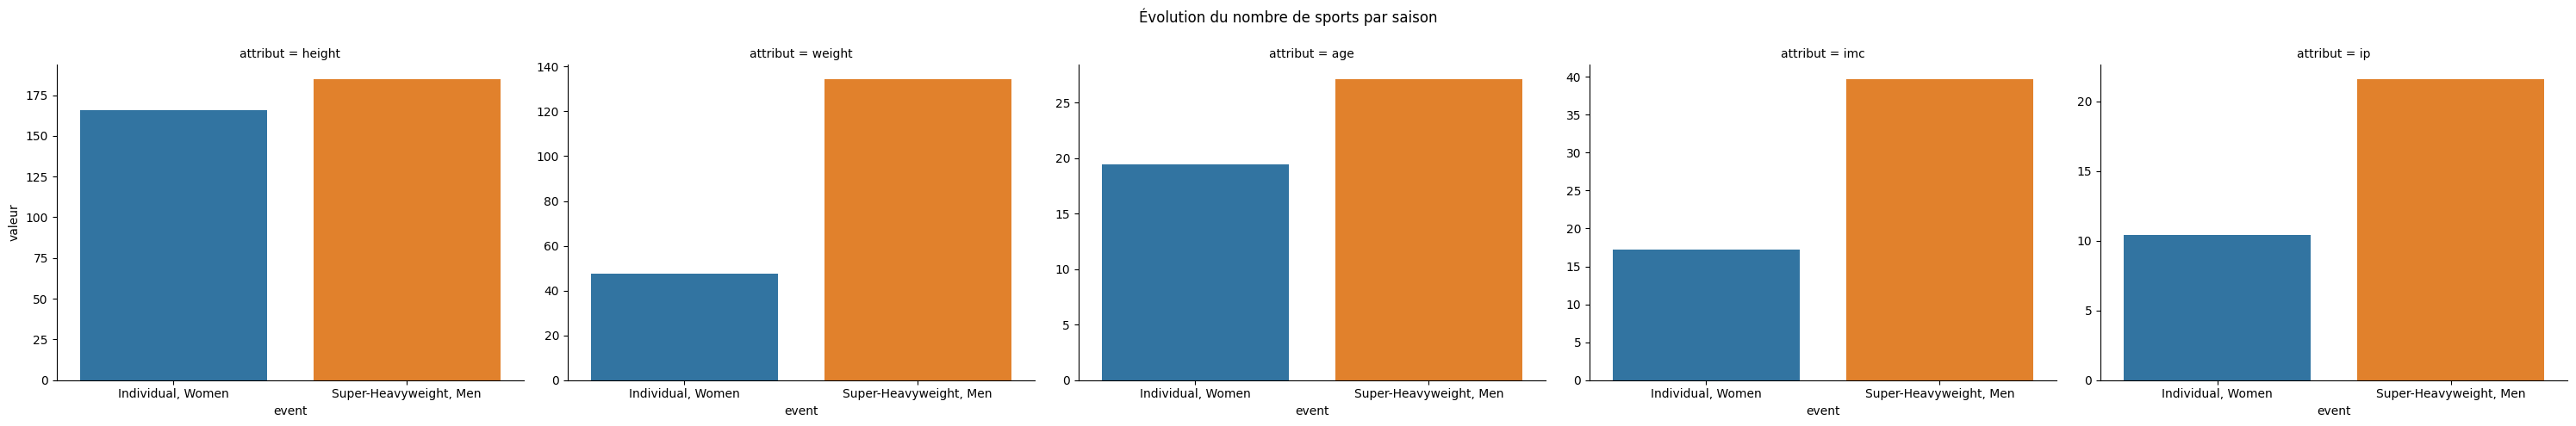

In [263]:
sns.catplot(
    data=resultat_extremes_long,
    x='event', 
    y='valeur', 
    col='attribut', # Crée un graphique par saison
    hue='event', 
    kind='bar', 
    height=5, 
    aspect=1.2,
    sharey = False # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

In [264]:
# #NORMALISATON DU DF LONG

# # 1. Calcul des min et max pour chaque attribut (depuis votre profil_type global)
# # Cela permet de garder une base de référence cohérente
# stats_min = profil_type[['height', 'weight', 'age', 'imc', 'ip']].min()
# stats_max = profil_type[['height', 'weight', 'age', 'imc', 'ip']].max()

# # 2. Fonction pour normaliser (score de 0 à 100 pour plus de lisibilité)
# def normalize_row(row):
#     attr = row['attribut']
#     val = row['valeur']
#     return (val - stats_min[attr]) / (stats_max[attr] - stats_min[attr]) * 100

# # 3. On applique la normalisation sur votre DataFrame long
# resultat_extremes_long['valeur_norm'] = resultat_extremes_long.apply(normalize_row, axis=1)

# resultat_extremes_long

In [265]:
# #NORMALISATION DU SPIDER CHART

# fig = px.line_polar(
#     resultat_extremes_long,
#     r='valeur_norm',
#     theta='attribut',
#     color='event',
#     line_close=True,
#     markers=True,
#     template='plotly_white',
#     #range_r=[0, 10],  # fixe une échelle commune

# )

# fig.update_traces(
#     fill='toself', 
#     opacity=0.3)

# fig.update_layout(go.Layout(
#     title=go.layout.Title(
#         text="<b>Profil type de l'athlete participant</b>",
#         x=0.5,
#         y=0.98,
#         font=dict(
#             size = 18,
#             color="black"
#         )
#     )
# ))

# fig.update_layout(
#     width=1000,
#     height=800
# )



# fig.show()

### Les athletes qui ont fait le plus d'olympiades

In [266]:
df_participation = df_athlete_result.groupby(['athlete'])['edition'].nunique().reset_index(name='Nb_Editions_Participées')

In [267]:
df_sport = df_athlete_result[['athlete', 'sport']].drop_duplicates(subset=['athlete'], keep='first')
#df_sport

In [268]:
df_participation = pd.merge(
    df_participation, 
    df_sport, 
    on='athlete', 
    how='left'
)

In [269]:
#top99
df_top_99_assidus = df_participation.sort_values(by='Nb_Editions_Participées', ascending=False).head(99)
print(df_top_99_assidus.head(99))

                   athlete  Nb_Editions_Participées                sport
58755           Ian Millar                       10   Equestrian Jumping
144442   Vladimir Andreyev                        9              Fencing
11939       Antonio García                        9             Football
144614    Vladimir Morozov                        9       Figure Skating
72895           José Ramos                        9            Wrestling
...                    ...                      ...                  ...
10360    Anky van Grunsven                        7  Equestrian Dressage
128100       Segun Toriola                        7         Table Tennis
128653      Sergey Makarov                        7            Athletics
128148     Seiko Hashimoto                        7        Speed Skating
110605  Otryadyn Gündegmaa                        7             Shooting

[99 rows x 3 columns]


## 5. Analyse des pays

### Nombre d'organisation par pays et saison

In [270]:
# On groupe par pays et saison, on compte, puis on pivote les saisons en colonnes
jo_attribution = df_games.groupby(['country_noc', 'season']).size().unstack(fill_value=0)

                    #.size() : Compte le nombre d'occurrences pour chaque combinaison (Pays, Saison).
                    #.unstack(fill_value=0) : C'est l'étape clé. Elle transforme les valeurs de la colonne season (Summer/Winter) en colonnes individuelles. Le fill_value=0 permet de remplacer les NaN par des zéros si un pays n'a fait que l'un ou l'autre.

# On ajoute une colonne Total
jo_attribution['Total'] = jo_attribution.sum(axis=1)

# # On trie par le total
jo_attribution = jo_attribution.sort_values(by='Total', ascending=False).reset_index()

jo_attribution.head(4)

season,country_noc,Other,Summer,Winter,Total
0,USA,0,5,4,9
1,FRA,0,3,3,6
2,ITA,0,1,4,5
3,GBR,0,4,0,4


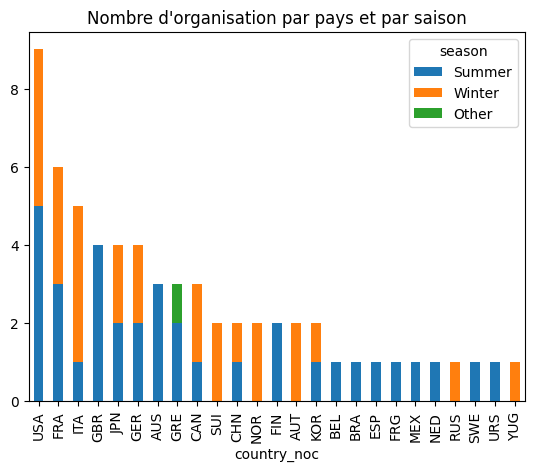

In [271]:
jo_attribution.set_index('country_noc')[['Summer', 'Winter', 'Other']].plot(kind='bar' ,
                                                                            stacked='True')

plt.title("Nombre d'organisation par pays et par saison")
plt.show()

### Nombre d'athletes pour la delegation française

In [272]:
df_bio_result_merged.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,nan,...,NaN,NaN,NaN,NaN,Summer,1908,Sport without weight category,Summer,Individual,Men


In [273]:
df_nb_athlete_delegation = df_bio_result_merged.groupby(['year','season','country_noc'])['athlete_id'].nunique().reset_index()
df_nb_athlete_delegation.sample(3)

,year,season,country_noc,athlete_id
1748,1988,Summer,IND,48
2984,2006,Winter,KAZ,56
3123,2008,Summer,KIR,2


In [274]:
pays_target = ['FRA'] 
df_plot = df_nb_athlete_delegation[df_nb_athlete_delegation['country_noc'].isin(pays_target)]
df_plot.head(3)

,year,season,country_noc,athlete_id
4,1896,Summer,FRA,18
21,1900,Summer,FRA,1466
59,1908,Summer,FRA,283


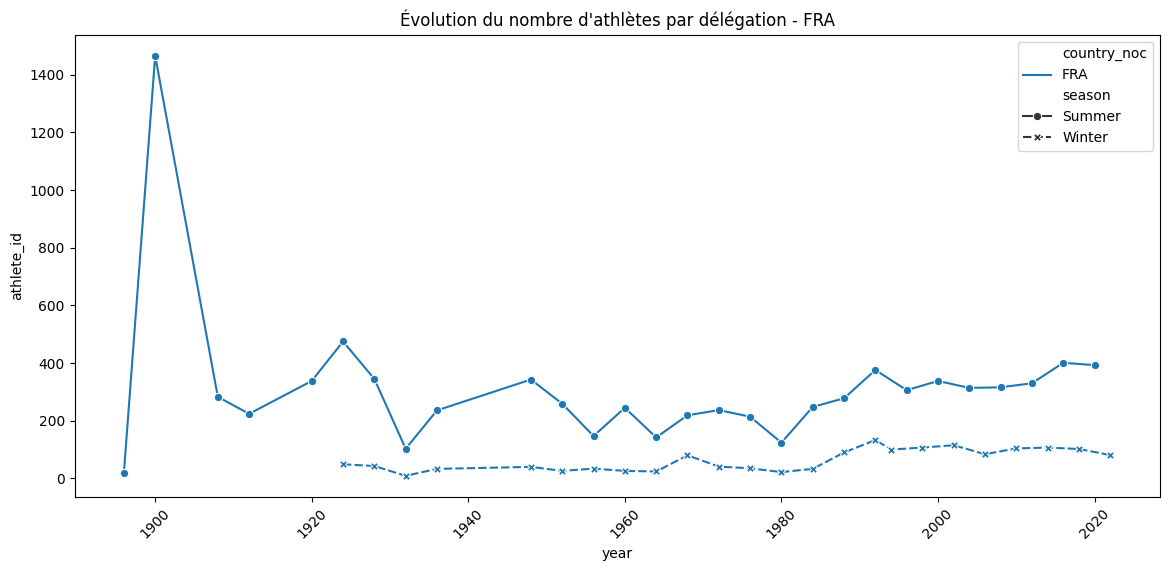

In [275]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot, x='year', y='athlete_id', hue='country_noc', style='season', markers=True)
plt.title("Évolution du nombre d'athlètes par délégation - FRA")
plt.xticks(rotation=45)
plt.show()

### Comparatif pour plusieurs délégations

In [276]:
pays_target = ['USA', 'FRA' , 'CHN']
df_plot = df_nb_athlete_delegation[df_nb_athlete_delegation['country_noc'].isin(pays_target)]

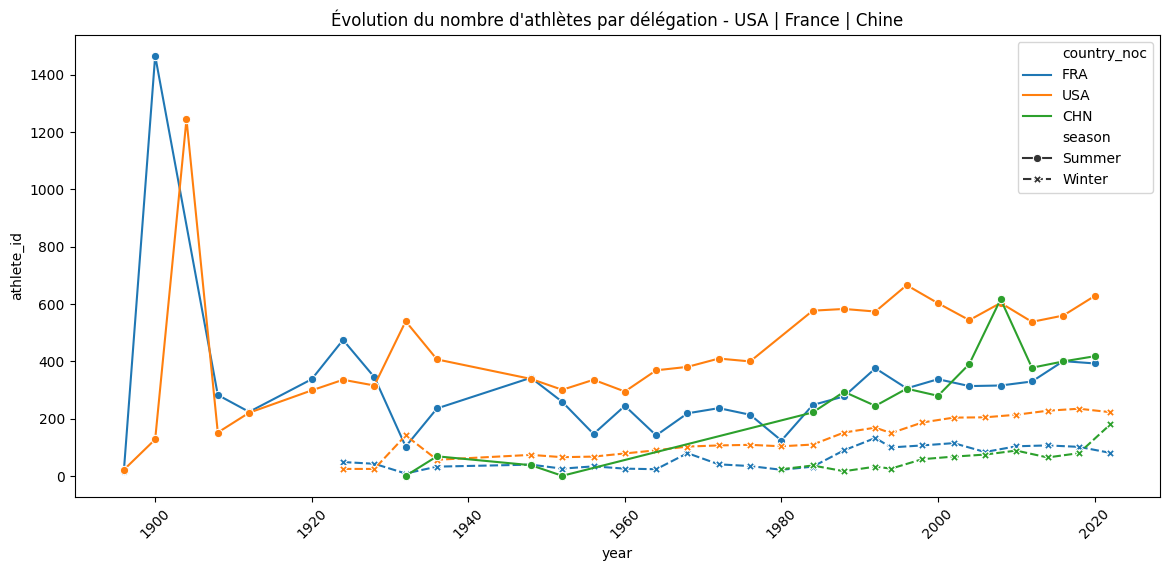

In [277]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot,
             x='year', 
             y='athlete_id', 
             hue='country_noc', 
             style='season', 
             markers=True)
plt.title("Évolution du nombre d'athlètes par délégation - USA | France | Chine")
plt.xticks(rotation=45)
plt.show()

## 6. Analyse par sport & épreuve

### Quelle est l'évolution morphologique des nageurs ?

<Axes: xlabel='edition_year', ylabel='height'>

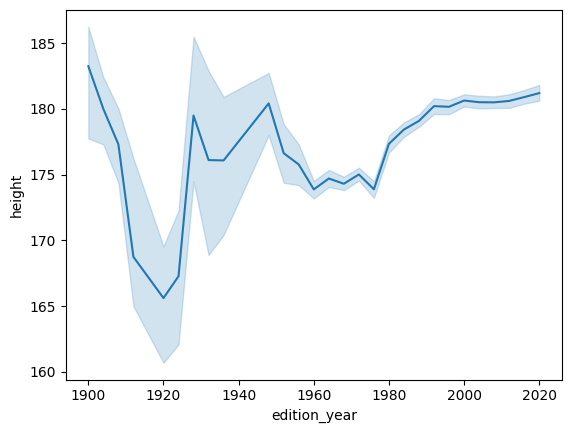

In [278]:
df_swimming = df_bio_result_merged[df_bio_result_merged['sport'] == 'Swimming']

sns.lineplot(
    data = df_swimming,
    x='edition_year',
    y='height'
)

<Axes: xlabel='edition_year', ylabel='weight'>

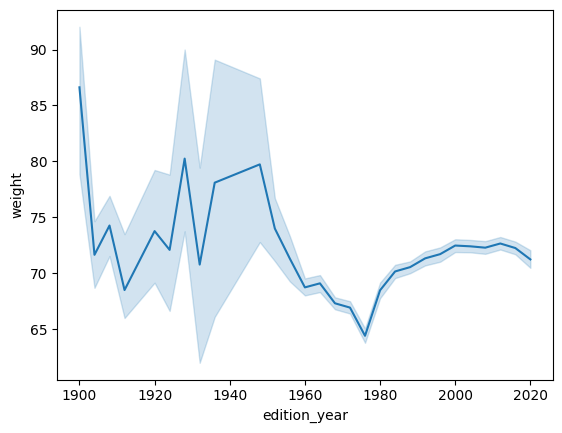

In [279]:
sns.lineplot(
    data = df_swimming,
    x='edition_year',
    y='weight'
)

### Profil type du participant sur un sport_event spécifique

In [280]:
#Je filtre sur mes participants "Male" du sport_event "2"
#Je regarde tous les participants (médaillés ou non)

df_profil_type_all = df_bio_result_merged[
    (df_bio_result_merged['season'].isin(['Summer', 'Winter'])) &
    (df_bio_result_merged['sport_event_id'] == 2) &
    (df_bio_result_merged['sex'] == 'Male')
    ]

df_profil_type_all.sample(3)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
65611,2016 Summer Olympics,59,JAM,Athletics,"400 metres, Men",358596,Rusheen McDonald,127134,6 h2 r2/3,nan,...,175.0,81.0,26.448980,15.113703,Summer,2016,Sport without weight category,Summer,Individual,Men
168728,1988 Summer Olympics,22,TTO,Athletics,"400 metres, Men",63309,Patrick Delice,76916,7 h4 r2/4,nan,...,184.0,77.0,22.743384,12.360535,Summer,1988,Sport without weight category,Summer,Individual,Men
65968,1972 Summer Olympics,18,LBR,Athletics,"400 metres, Men",61050,Thomas N'Ma,73132,5 h3 r1/4,nan,...,175.0,64.0,20.897959,11.941691,Summer,1972,Sport without weight category,Summer,Individual,Men


In [281]:
profil_type_all = df_profil_type_all.groupby(['sport_event_id','sport' , 'event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type_all['statut'] = "participant"
profil_type_all

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.12286,12.33499,participant


In [282]:
#Je filtre sur mes participants "Male" du sport_event "2"
#Cette fois-ci je ne garde que les médaillés

df_profil_type_medal_only = df_bio_result_merged[
    (df_bio_result_merged['season'].isin(['Summer', 'Winter'])) &
    (df_bio_result_merged['sport_event_id'] == 2) &
    (df_bio_result_merged['sex'] == 'Male') & 
    (df_bio_result_merged['medal'] != "nan")
    ]

df_profil_type_medal_only.sample(3)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,height,weight,imc,ip,season,year,weight_category_sport,season_y,collective_sport,gender_category
292182,1900 Summer Olympics,2,USA,Athletics,"400 metres, Men",56053,Bill Holland,78564,2,Silver,...,NaN,NaN,NaN,NaN,Summer,1900,Sport without weight category,Summer,Individual,Men
18075,2020 Summer Olympics,61,GRN,Athletics,"400 metres, Men",19000394,Kirani James,120724,3,Bronze,...,180.0,66.0,20.370370,11.316872,Summer,2020,Sport without weight category,Summer,Individual,Men
292122,1896 Summer Olympics,1,USA,Athletics,"400 metres, Men",56006,Tom Burke,78175,1,Gold,...,183.0,66.0,19.707964,10.769379,Summer,1896,Sport without weight category,Summer,Individual,Men


In [283]:
profil_type = df_profil_type_medal_only.groupby(['sport_event_id','sport' , 'event'])[['height', 'weight',	'age',	'imc',	'ip']].mean().reset_index()
profil_type['statut'] = "médaillé"
profil_type

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",182.765432,74.6125,23.965116,22.270757,12.18552,médaillé


In [284]:
# Je concatène les deux résumés d'une ligne
profil_type_total = pd.concat([profil_type_all, profil_type], ignore_index=True)
profil_type_total

,sport_event_id,sport,event,height,weight,age,imc,ip,statut
0,2,Athletics,"400 metres, Men",179.642342,71.461228,24.184323,22.122860,12.33499,participant
1,2,Athletics,"400 metres, Men",182.765432,74.612500,23.965116,22.270757,12.18552,médaillé


<Axes: >

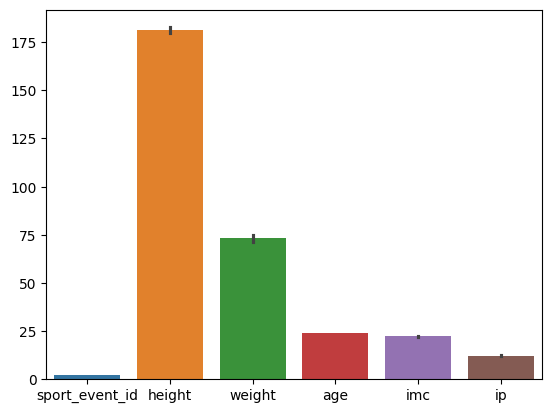

In [285]:
sns.barplot(data=profil_type_total,
            )

In [286]:
# Je transforme en tableau long

profil_type_total_long = profil_type_total.melt(
    id_vars=['statut','sport_event_id','sport','event'],
    value_vars=['height', 'weight',	'age',	'imc',	'ip'],
    var_name='attribut',
    value_name='valeur'
)

profil_type_total_long.head(4)

,statut,sport_event_id,sport,event,attribut,valeur
0,participant,2,Athletics,"400 metres, Men",height,179.642342
1,médaillé,2,Athletics,"400 metres, Men",height,182.765432
2,participant,2,Athletics,"400 metres, Men",weight,71.461228
3,médaillé,2,Athletics,"400 metres, Men",weight,74.6125


In [287]:
fig = px.line_polar(
    profil_type_total_long,
    r='valeur',
    theta='attribut',
    color='statut',
    line_close=True,
    markers=True,
    template='plotly_white',
    #range_r=[0, 10],  # fixe une échelle commune

)

fig.update_traces(
    fill='toself', 
    opacity=0.3)

fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Profil type de l'athlete participant</b>",
        x=0.5,
        y=0.98,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    width=1000,
    height=800
)



fig.show()

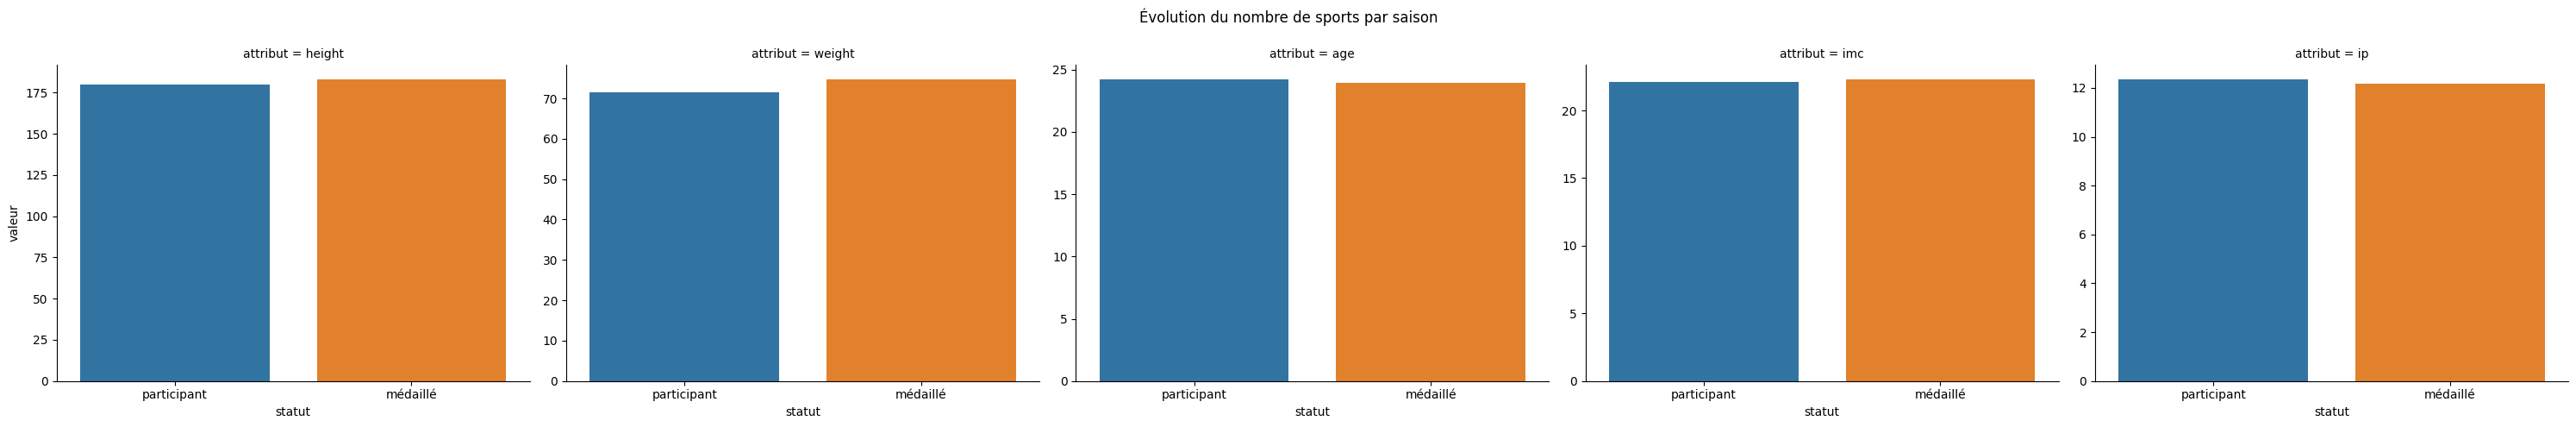

In [288]:
sns.catplot(
    data=profil_type_total_long,
    x='statut', 
    y='valeur', 
    col='attribut', # Crée un graphique par saison
    hue='statut', 
    kind='bar', 
    height=5, 
    aspect=1.2,
    sharey = False # permet à l'Hiver d'avoir sa propre échelle
)

plt.subplots_adjust(top=0.85) # Ajuste l'espace pour le titre
plt.suptitle("Évolution du nombre de sports par saison")
plt.show()

### Fréquence des sports dans le top 50 des participations 

In [289]:
repartition_sports_top_99 = df_top_99_assidus['sport'].value_counts()

In [290]:
print("--- Répartition des Sports parmi les 50 Athlètes les plus Assidus ---")
print(repartition_sports_top_99)
print("---------------------------------------------------------------------")

--- Répartition des Sports parmi les 50 Athlètes les plus Assidus ---
sport
Shooting                 16
Sailing                   8
Athletics                 8
Fencing                   7
Equestrian Jumping        7
Rowing                    6
Equestrian Eventing       6
Table Tennis              6
Ski Jumping               4
Weightlifting             4
Artistic Gymnastics       3
Football                  3
Hockey                    2
Speed Skating             2
Figure Skating            1
Bobsleigh                 1
Cycling Mountain Bike     1
Wrestling                 1
Canoe Marathon            1
Luge                      1
Tennis                    1
Canoe Sprint              1
Archery                   1
Volleyball                1
Boxing                    1
Swimming                  1
Basketball                1
Judo                      1
Cycling Track             1
Cross Country Skiing      1
Equestrian Dressage       1
Name: count, dtype: int64
------------------------------

In [291]:
print("\nRépartition en Pourcentage :")
repartition_sports_top_99_pct = df_top_99_assidus['sport'].value_counts(normalize=True) * 100
print(repartition_sports_top_99_pct.round(1).astype(str) + '%')


Répartition en Pourcentage :
sport
Shooting                 16.2%
Sailing                   8.1%
Athletics                 8.1%
Fencing                   7.1%
Equestrian Jumping        7.1%
Rowing                    6.1%
Equestrian Eventing       6.1%
Table Tennis              6.1%
Ski Jumping               4.0%
Weightlifting             4.0%
Artistic Gymnastics       3.0%
Football                  3.0%
Hockey                    2.0%
Speed Skating             2.0%
Figure Skating            1.0%
Bobsleigh                 1.0%
Cycling Mountain Bike     1.0%
Wrestling                 1.0%
Canoe Marathon            1.0%
Luge                      1.0%
Tennis                    1.0%
Canoe Sprint              1.0%
Archery                   1.0%
Volleyball                1.0%
Boxing                    1.0%
Swimming                  1.0%
Basketball                1.0%
Judo                      1.0%
Cycling Track             1.0%
Cross Country Skiing      1.0%
Equestrian Dressage       1.0%
Nam

In [292]:
fig = px.bar(
    repartition_sports_top_99.reset_index(),
    x='sport',                         # Les sports sur l'axe X
    y='count',                         # Le nombre d'athlètes (compte) sur l'axe Y
    title="Which disciplines are most represented in long careers ?",
    labels={'sport': 'Sport', 'count': "Nombre d'Athlètes dans le Top 50"},
    color='count',
    color_continuous_scale=px.colors.sequential.Plasma # Utilisation d'une palette de couleurs
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'}, # Trier les barres de la plus haute à la plus basse
    width=1000,
    height=600
)

fig.show()

## 7. Corrélations entre les facteurs ?

In [293]:
df_bio.head(2)

,athlete_id,name,sex,born,height,weight,country,country_noc,imc,ip,born_year
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.0,Bulgaria,BUL,19.959355,12.023708,1949
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.0,Russian Federation,RUS,20.675803,11.236850,1977


In [294]:
df_athlete_result.tail(2)

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,athlete_born_year,edition_year,age,country_noc_edition,home_country_edition,sport_event_id,sport_id
315624,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,nan,1985,2022,37,CHN,False,778,22
315625,2022 Winter Olympics,62,UKR,Bobsleigh,"Monobob, Women",19019671,Lidiya Hunko,149047,20,nan,1993,2022,29,CHN,False,778,22


In [295]:
df_athlete_result['medal'].value_counts(dropna=False)

medal
nan       270940
Gold       15072
Bronze     14938
Silver     14676
Name: count, dtype: int64

In [296]:
df_athlete_result['home_country_edition'].value_counts(dropna=False)

home_country_edition
False    288595
True      27031
Name: count, dtype: int64

In [297]:
df_athletes_features = df_bio[['athlete_id', 'sex', 'height', 'weight']]

In [298]:
df_athlete = df_athlete_result [['athlete_id', 'medal', 'age', 'home_country_edition']]

In [299]:
df_athlete.head(1)

,athlete_id,medal,age,home_country_edition
0,64710,nan,19,False


In [300]:
df_merged = pd.merge(left=df_athletes_features,
                     right=df_athlete,
                     on = 'athlete_id',
                     how = 'left') 

In [301]:
df_merged.tail()

,athlete_id,sex,height,weight,medal,age,home_country_edition
315614,74003,Male,188.0,79.0,nan,23,False
315615,74003,Male,188.0,79.0,nan,27,False
315616,74003,Male,188.0,79.0,nan,27,False
315617,74003,Male,188.0,79.0,nan,31,False
315618,74003,Male,188.0,79.0,Gold,31,False


In [302]:
df_merged['home_country_edition'].value_counts(dropna=False)

home_country_edition
False    288590
True      27029
Name: count, dtype: int64

In [303]:
#encoder pour faire correlation - sex - medal - home_country_edition

df_merged['sex'] = df_merged['sex'].map({'Male' : 0, 'Female' : 1})
df_merged['medal'] = df_merged['medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1}).fillna(0)
df_merged['home_country_edition'] = df_merged['home_country_edition'].fillna(False).astype('int')


In [304]:
df_merged['medal'].value_counts(dropna=False)

medal
0.0    270934
1.0     44685
Name: count, dtype: int64

In [305]:
df_merged['home_country_edition'].value_counts(dropna=False)

home_country_edition
0    288590
1     27029
Name: count, dtype: int64

In [306]:
features = ['age', 'weight', 'height','sex', 'home_country_edition']

In [307]:
corr  =df_merged[features + ['medal']].corr()

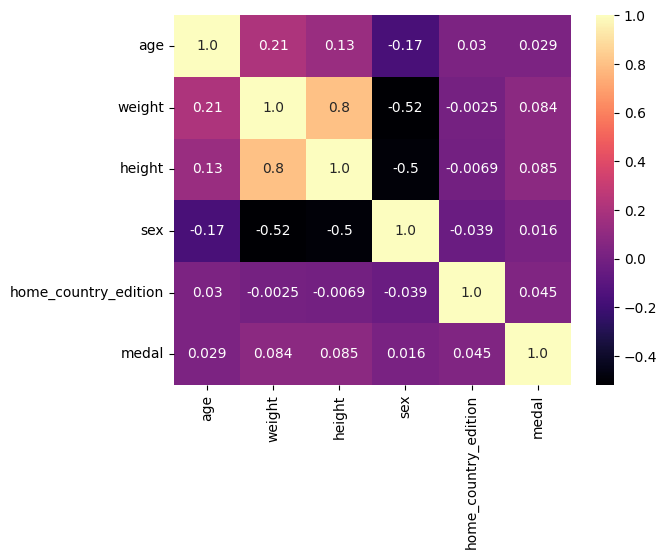

In [308]:
sns.heatmap(corr,
            annot=True,
            cmap= 'magma',
            fmt=".2")

plt.show()